In [2]:
import nibabel as nib
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
import os

In [3]:
# Set your voxel threshold here
VOXEL_THRESHOLD = 25

def get_clusters(img_data, voxel_threshold):
    # Get the unique intensities in the image data (excluding 0)
    unique_intensities = np.unique(img_data)[np.nonzero(np.unique(img_data))]

    # Prepare the result
    result = []

    # Loop over each unique intensity
    for intensity in unique_intensities:
        # Create a binary image where the voxels with the current intensity are 1 and the others are 0
        img_data_binary = img_data == intensity

        # Label each cluster in the binary image
        labeled_array, num_features = ndimage.label(img_data_binary)

        # Get the size of each cluster
        cluster_sizes = ndimage.sum(img_data_binary, labeled_array, range(1, num_features + 1))

        # Get the indexes of clusters that are above the size threshold
        cluster_indexes = np.where(cluster_sizes > voxel_threshold)[0] + 1

        # Loop over each cluster index
        for cluster_index in cluster_indexes:
            # Get the coordinates of the voxels in this cluster
            voxel_coordinates = np.transpose(np.where(labeled_array == cluster_index))

            # Calculate the center of the cluster
            center_of_cluster = np.mean(voxel_coordinates, axis=0)

            # Append the voxel coordinates, center of the cluster, and intensity to the result
            result.append((voxel_coordinates, center_of_cluster, intensity))

    return result

def process_brain_volume(inf_change, rootpath, phenotype, voxel_threshold=VOXEL_THRESHOLD):
    # Load the .nii.gz file
    img = nib.load(inf_change)


    # Get the image data as a numpy array
    img_data = img.get_fdata()

    # Get the atlas as a numpy array
    atlas = nib.load("/Users/dkor/fsl/data/atlases/JHU/JHU-ICBM-labels-2mm.nii.gz")
    atlas_data = atlas.get_fdata()
    

    # Get the clusters
    clusters = get_clusters(img_data, voxel_threshold)

    # Print the clusters
    for i, (voxel_coordinates, center_of_cluster, cluster_intensity) in enumerate(clusters, start=1):
        
        parameter = model_names[int(cluster_intensity)]
        
        print(f"Cluster {i} :")
        print(f"Intensity : {int(cluster_intensity)}")
        print(f"Parameter : {parameter}")
        print(f"Center of Cluster (x, y, z): {center_of_cluster}")
        print(f"Cluster size (number of vox): {voxel_coordinates.shape[0]}")
        
        #construct probability and amount nii.gz based on selected parameter
        
        probability = os.path.join(rootpath,phenotype,f"{parameter}_probability_{phenotype}.nii.gz")
        amount = os.path.join(rootpath,phenotype,f"{parameter}_amount_{phenotype}.nii.gz")
       
        prob = nib.load(probability)
        am = nib.load(amount)
        
        prob_data = prob.get_fdata()
        amount_data = am.get_fdata()

        # output the probabilities and amounts for each cluster:
        
        labels = atlas_data[voxel_coordinates[:,0], voxel_coordinates[:,1], voxel_coordinates[:,2]].astype(int)
        
        fig, ax = plt.subplots(1,3, figsize=(15, 4)) 
        plt.suptitle(f"Cluster {i}, parameter {parameter}")
        ax[0].hist(prob_data[voxel_coordinates[:,0], voxel_coordinates[:,1], voxel_coordinates[:,2]],bins=20)
        ax[0].set_title("Prob")
        ax[1].hist(amount_data[voxel_coordinates[:,0], voxel_coordinates[:,1], voxel_coordinates[:,2]],bins=20)
        ax[1].set_title("Amount")
        ax[2].hist(labels,bins=20)
        ax[2].set_title("Label")
        
        #print the tract index with highest count
        counts = np.bincount(labels)
        mode = np.argmax(counts)
        
        print(f"Tract label : {mode} \n")


# Test the script with a .nii.gz file
# process_brain_volume('path_to_your_file.nii.gz')

In [4]:
rootpath='/Users/dkor/OneDrive - Nexus365/UKBB/phenotype_analysis/large_scale_for_thesis/predictions'

In [5]:
from bench import change_model

ch_mdl = change_model.ChangeModel.load("/Users/dkor/OneDrive - Nexus365/UKBB/change_models/invivo/normalisation_by_baseline/2D_2nd/SM_ball_sphere/watson_stick_zeppelin_sphere_ball_30000_samples_1.7_diff")

model_names = ch_mdl.model_names

/Users/dkor/opt/miniconda3/envs/benchenv_v3/lib/python3.8/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator PolynomialFeatures from version 1.1.3 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


## Phenotype with clusters: (28)

Mean corpuscular haemoglobin concentration (2.0)
Pulse rate, automated reading (2.0)
Vitamin D (1.0)
Position of the pulse wave peak (2.0)
Diastolic blood pressure, automated reading (2.0) (lots of clusters) 
Creatinine (enzymatic) in urine (1.0) (lots of clusters)
Diastolic brachial blood pressure (2.0)
Position of the shoulder on the pulse waveform (2.0)
Mean corpuscular volume (2.0)
IGF-1 (1.0) (lots of clusters) 
Pulse rate (2.0)
Mean reticulocyte volume (2.0)
Urea (1.0) (lots of clusters)
Alanine aminotransferase (1.0) (lots of clusters)
Gamma glutamyltransferase (1.0) (lots of clusters)
HDL cholesterol (1.0) (lots of clusters)
End systolic pressure during PWA (2.1)
Potassium in urine (1.0)
Sodium in urine (1.0)
Eosinophill percentage (2.0)
Albumin (1.0)
SHBG (1.0)
Platelet distribution width (2.0)
Alkaline phosphatase (1.0)
Diastolic blood pressure, automated reading (2.1)(lots of clusters)
Mean corpuscular haemoglobin (2.0)
Mean sphered cell volume (2.0)
'Number of beats in waveform average for PWA (2.0)

## Parameters for table

Organise the table accordingly. What prarameters go in there? Number of clusters and cluster sizes


Cluster 1 :
Intensity : 9
Parameter : d_r_ex
Center of Cluster (x, y, z): [28.56140351 53.77192982 51.45614035]
Cluster size (number of vox): 57
Tract label : 41 



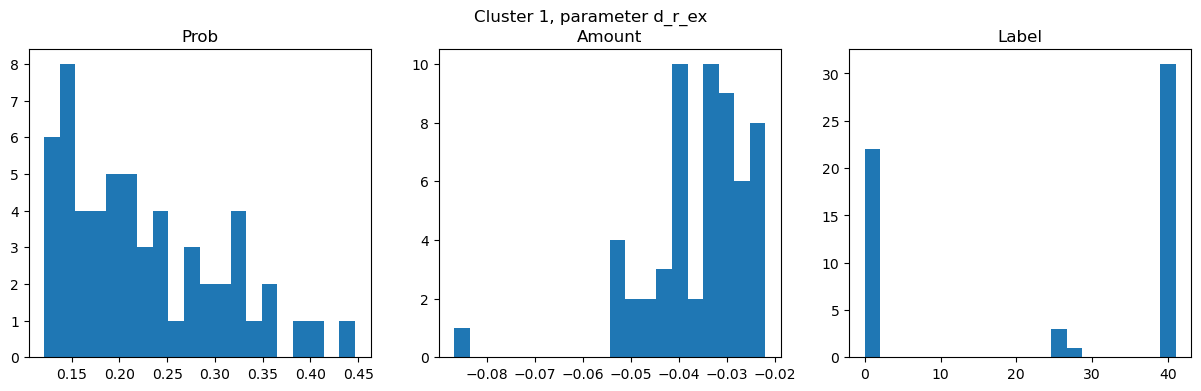

In [65]:
phenotype = 'Number of beats in waveform average for PWA (2.0)'
image_data = os.path.join(rootpath, phenotype, f'inferred_change_{phenotype}.nii.gz')
process_brain_volume(image_data, rootpath, phenotype)

Cluster 1 :
Intensity : 9
Parameter : d_r_ex
Center of Cluster (x, y, z): [46.84375 42.65625 42.5    ]
Cluster size (number of vox): 32
Tract label : 5 

Cluster 2 :
Intensity : 15
Parameter : -0.7*s_ex + 0.7*s_in
Center of Cluster (x, y, z): [43.96551724 43.77586207 43.53448276]
Cluster size (number of vox): 58
Tract label : 5 



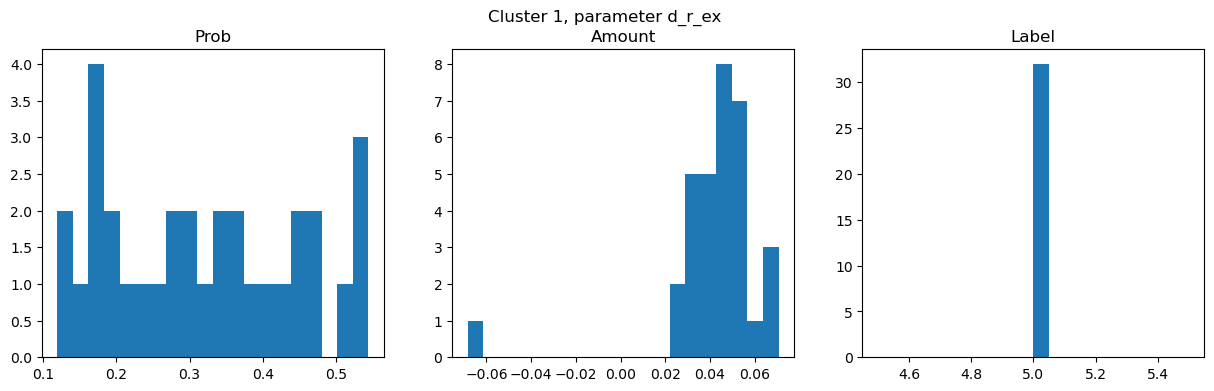

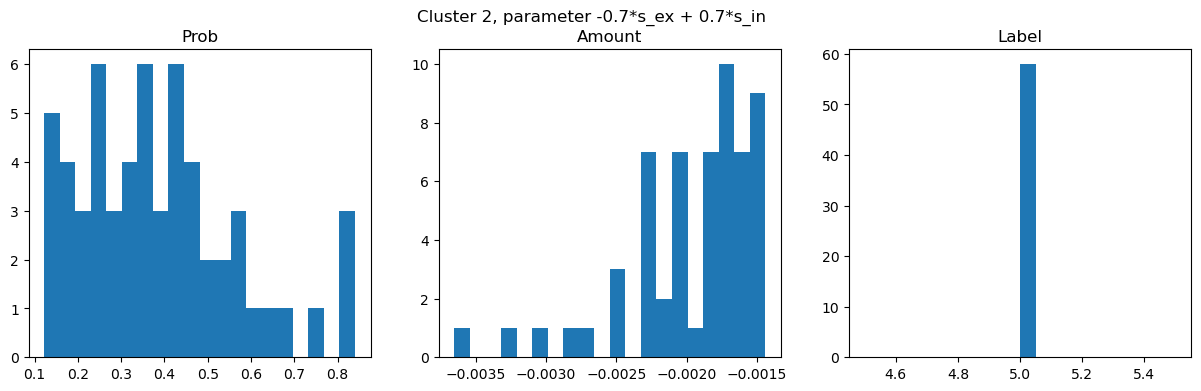

In [7]:
phenotype = 'Systolic blood pressure, automated reading (2.0)'
image_data = os.path.join(rootpath, phenotype, f'inferred_change_{phenotype}.nii.gz')
process_brain_volume(image_data, rootpath, phenotype)

Cluster 1 :
Intensity : 9
Parameter : d_r_ex
Center of Cluster (x, y, z): [37.66666667 77.37037037 31.14814815]
Cluster size (number of vox): 27
Tract label : 23 

Cluster 2 :
Intensity : 9
Parameter : d_r_ex
Center of Cluster (x, y, z): [45.21428571 43.85714286 42.97619048]
Cluster size (number of vox): 42
Tract label : 5 



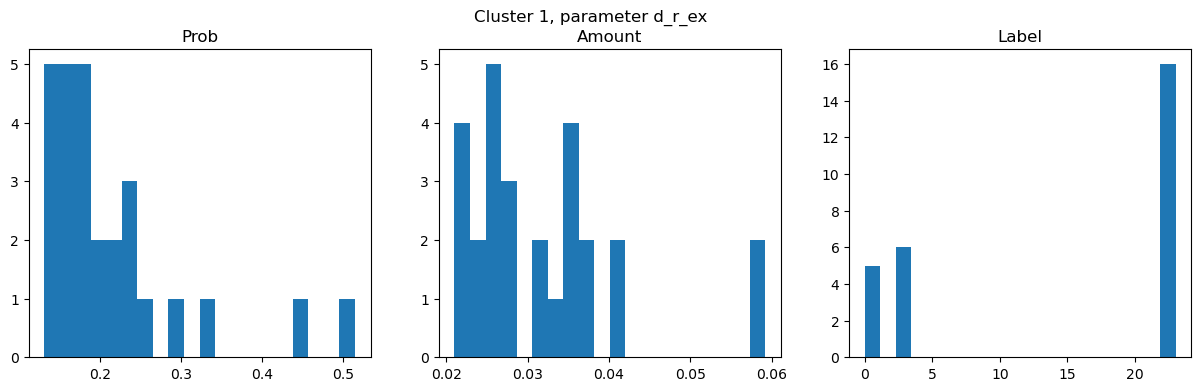

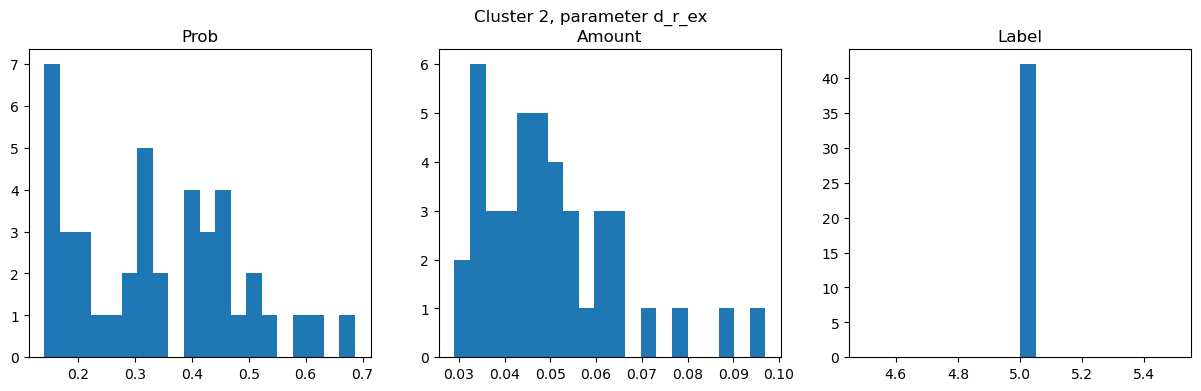

In [26]:
phenotype = 'Systolic blood pressure, automated reading (2.1)'
image_data = os.path.join(rootpath, phenotype, f'inferred_change_{phenotype}.nii.gz')
process_brain_volume(image_data, rootpath, phenotype)

Cluster 1 :
Intensity : 16
Parameter : -0.7*s_in + 0.7*s_sphere
Center of Cluster (x, y, z): [34.83333333 80.7        34.        ]
Cluster size (number of vox): 30
Tract label : 23 

Cluster 2 :
Intensity : 16
Parameter : -0.7*s_in + 0.7*s_sphere
Center of Cluster (x, y, z): [55.03125 82.15625 40.40625]
Cluster size (number of vox): 32
Tract label : 24 



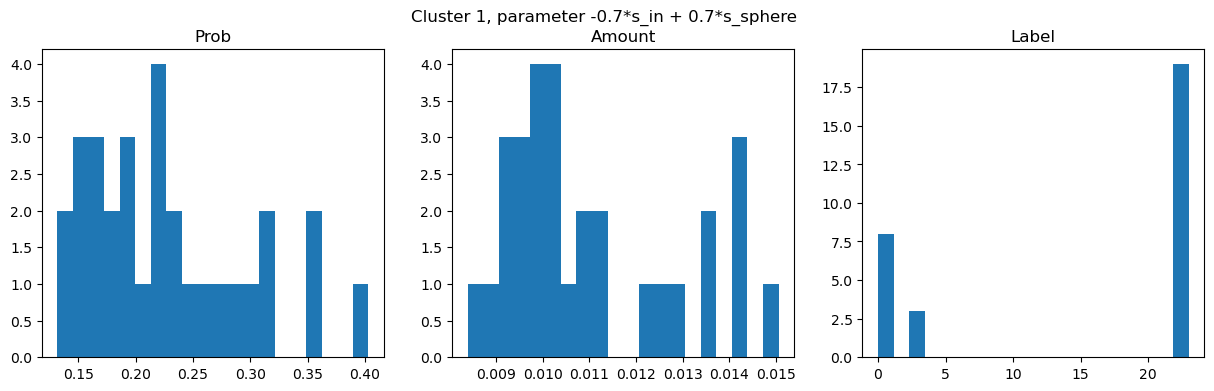

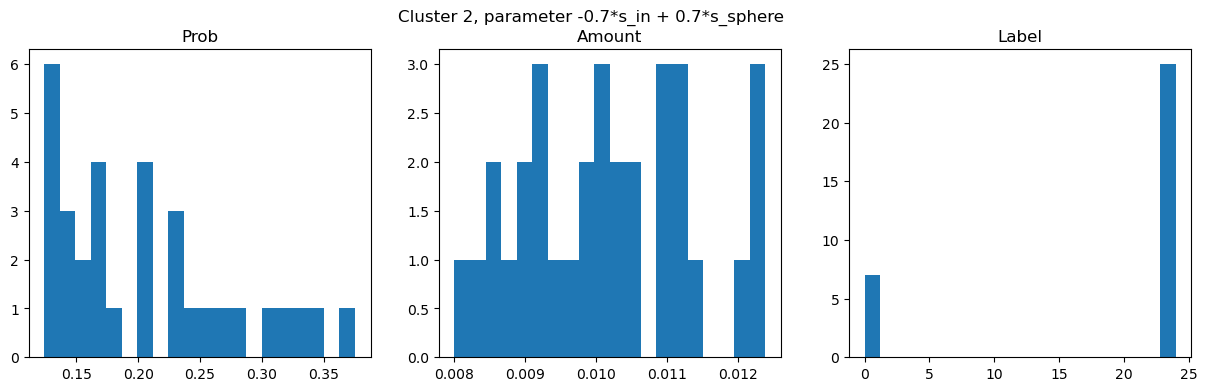

In [34]:
phenotype = 'Minimum carotid IMT (intima-medial thickness) at 120 degrees  (2.0)'
image_data = os.path.join(rootpath, phenotype, f'inferred_change_{phenotype}.nii.gz')
process_brain_volume(image_data, rootpath, phenotype)

Cluster 1 :
Intensity : 9
Parameter : d_r_ex
Center of Cluster (x, y, z): [55.88571429 75.42857143 47.8       ]
Cluster size (number of vox): 35
Tract label : 24 

Cluster 2 :
Intensity : 9
Parameter : d_r_ex
Center of Cluster (x, y, z): [57.325 44.1   51.75 ]
Cluster size (number of vox): 40
Tract label : 28 



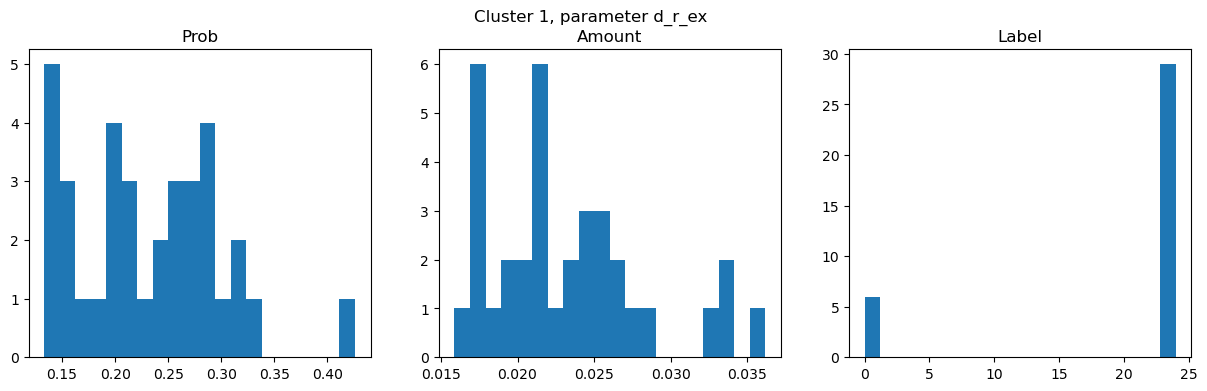

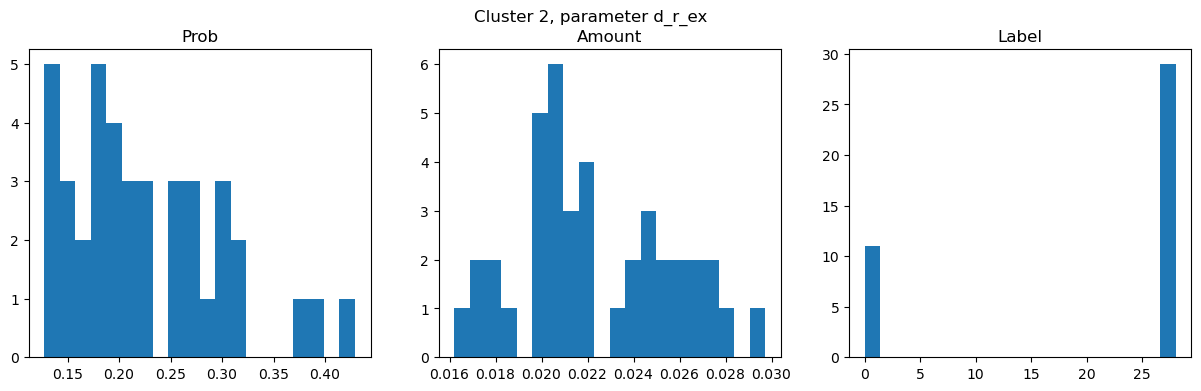

In [25]:
phenotype = 'Minimum carotid IMT (intima-medial thickness) at 150 degrees  (2.0)'
image_data = os.path.join(rootpath, phenotype, f'inferred_change_{phenotype}.nii.gz')
process_brain_volume(image_data, rootpath, phenotype)

Cluster 1 :
Intensity : 9
Parameter : d_r_ex
Center of Cluster (x, y, z): [54.1        78.63333333 41.26666667]
Cluster size (number of vox): 30
Tract label : 24 

Cluster 2 :
Intensity : 9
Parameter : d_r_ex
Center of Cluster (x, y, z): [57.01886792 36.73584906 51.20754717]
Cluster size (number of vox): 53
Tract label : 0 



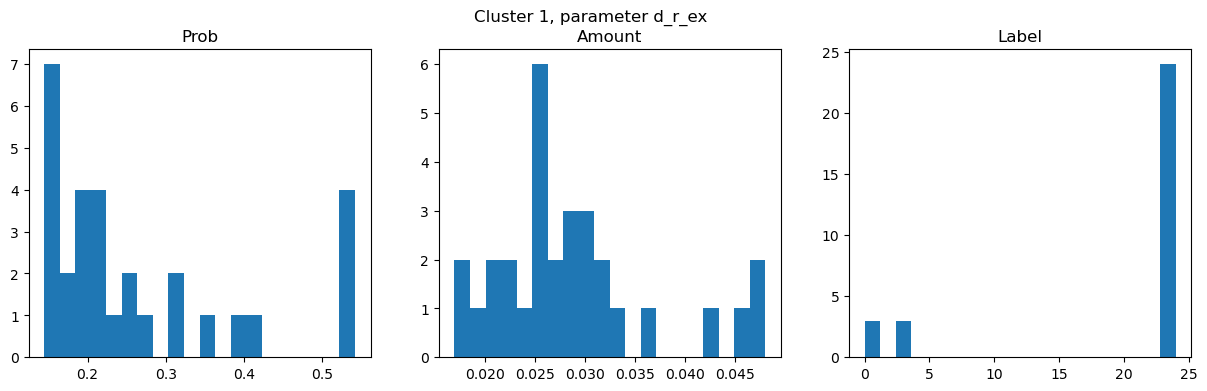

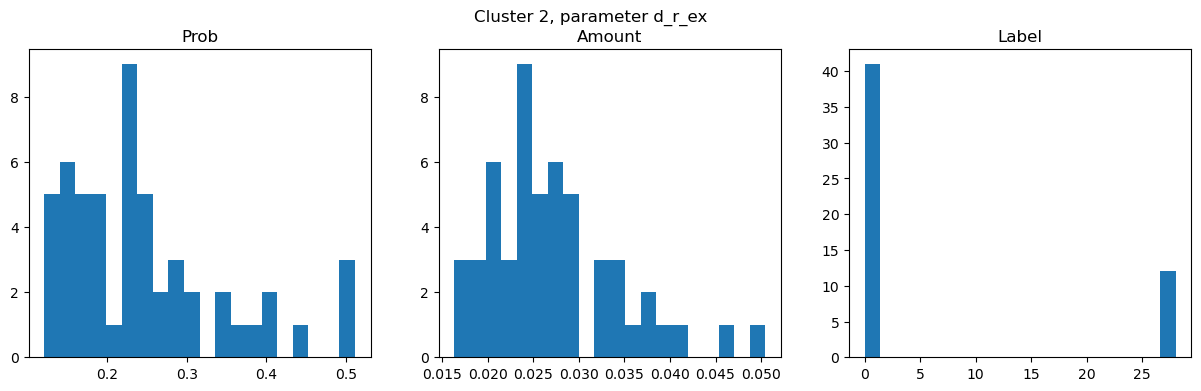

In [33]:
phenotype = 'Testosterone (1.0)'
image_data = os.path.join(rootpath, phenotype, f'inferred_change_{phenotype}.nii.gz')
process_brain_volume(image_data, rootpath, phenotype)

Cluster 1 :
Intensity : 5
Parameter : odi
Center of Cluster (x, y, z): [29.92307692 47.80769231 52.46153846]
Cluster size (number of vox): 26
Tract label : 41 

Cluster 2 :
Intensity : 9
Parameter : d_r_ex
Center of Cluster (x, y, z): [31.26666667 48.15555556 55.53333333]
Cluster size (number of vox): 45
Tract label : 0 

Cluster 3 :
Intensity : 9
Parameter : d_r_ex
Center of Cluster (x, y, z): [32.18461538 53.6        44.24615385]
Cluster size (number of vox): 65
Tract label : 19 

Cluster 4 :
Intensity : 9
Parameter : d_r_ex
Center of Cluster (x, y, z): [34.97368421 72.76315789 50.        ]
Cluster size (number of vox): 38
Tract label : 23 

Cluster 5 :
Intensity : 9
Parameter : d_r_ex
Center of Cluster (x, y, z): [33.85  85.525 39.425]
Cluster size (number of vox): 40
Tract label : 0 

Cluster 6 :
Intensity : 9
Parameter : d_r_ex
Center of Cluster (x, y, z): [58.2826087  46.06521739 54.23913043]
Cluster size (number of vox): 46
Tract label : 0 

Cluster 7 :
Intensity : 9
Parameter :

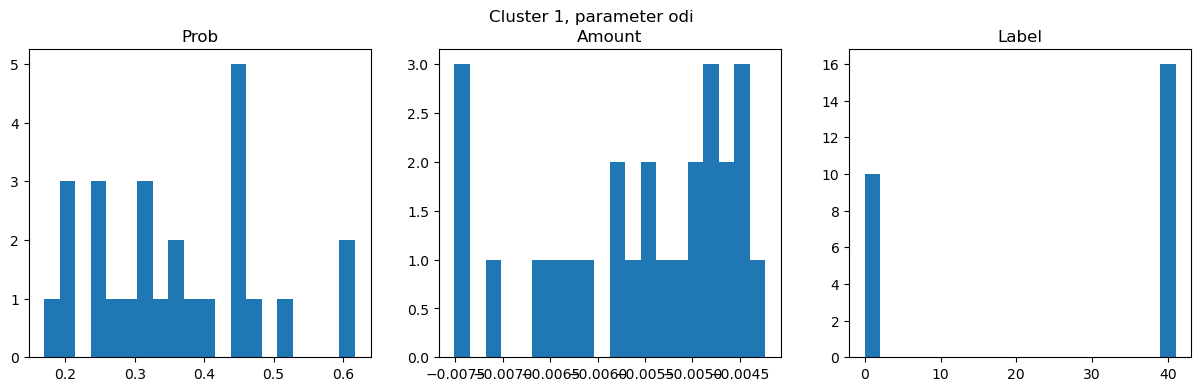

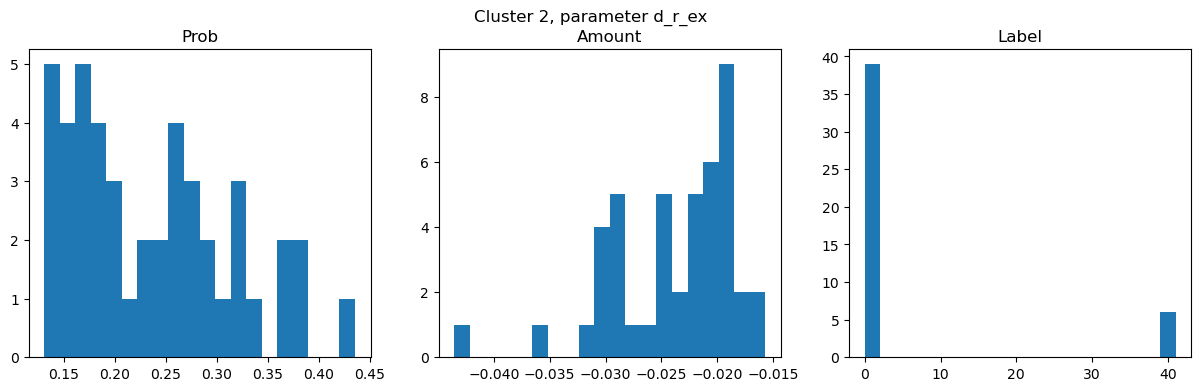

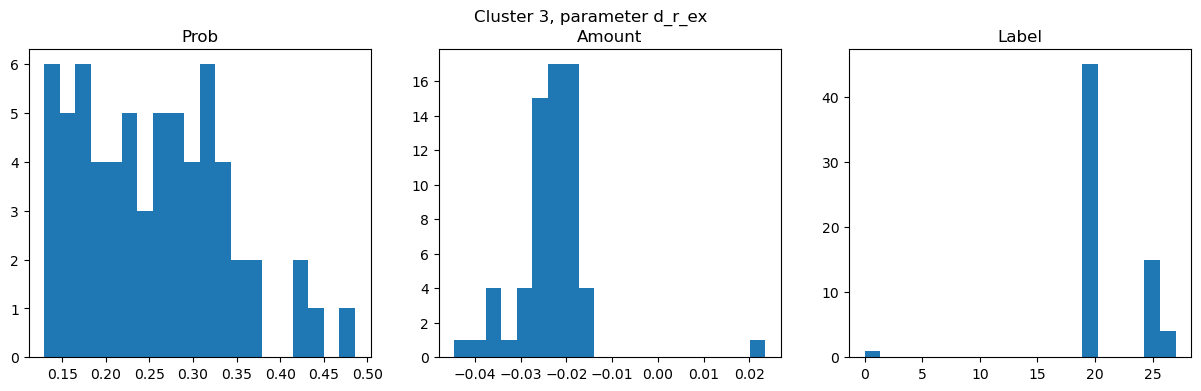

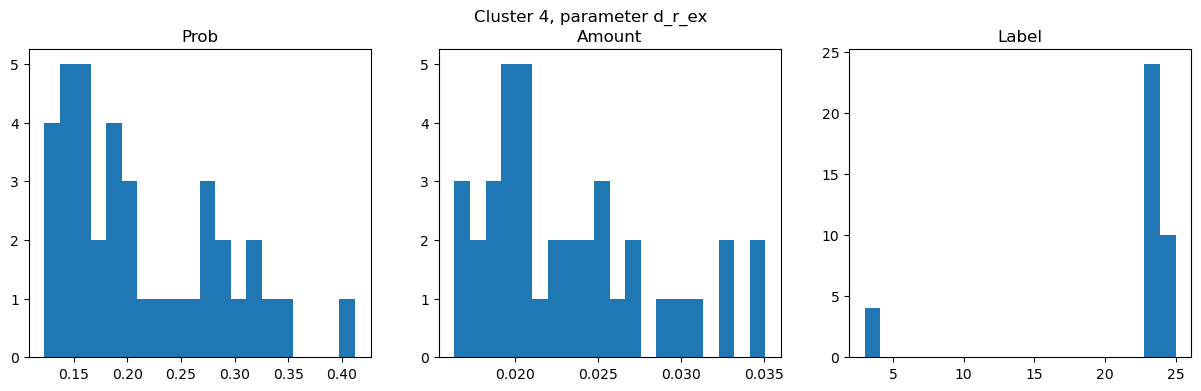

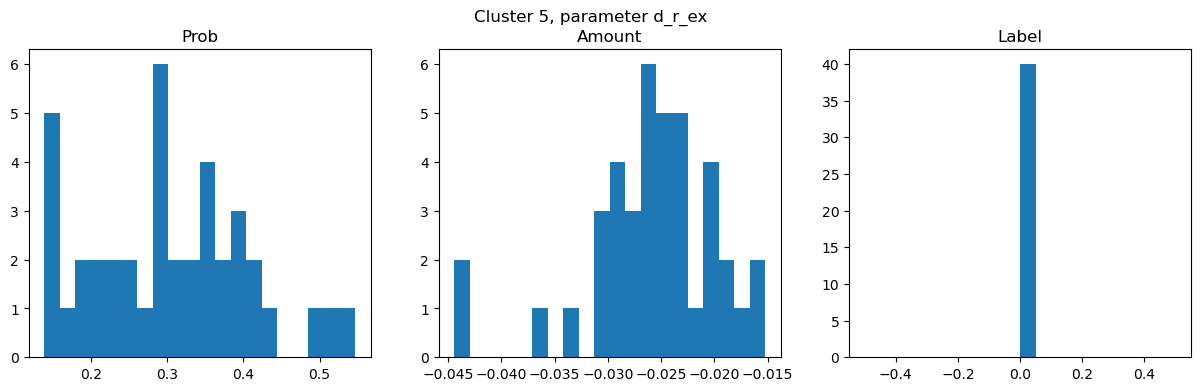

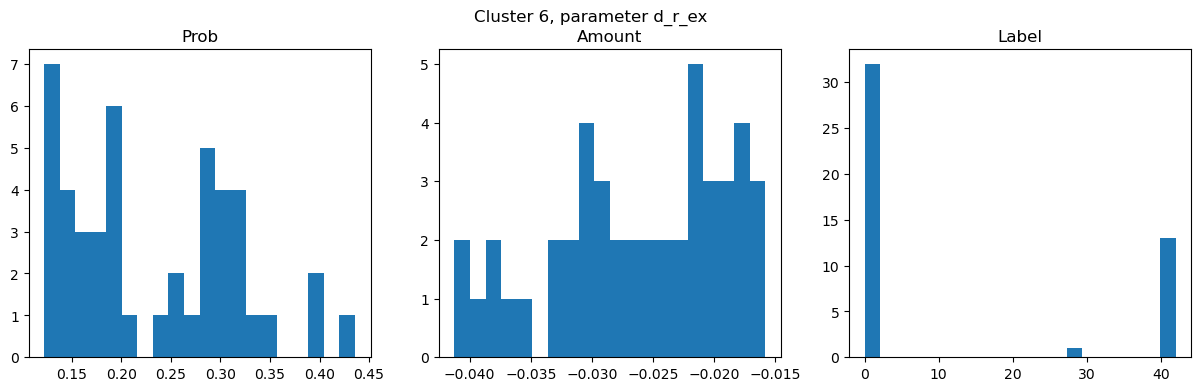

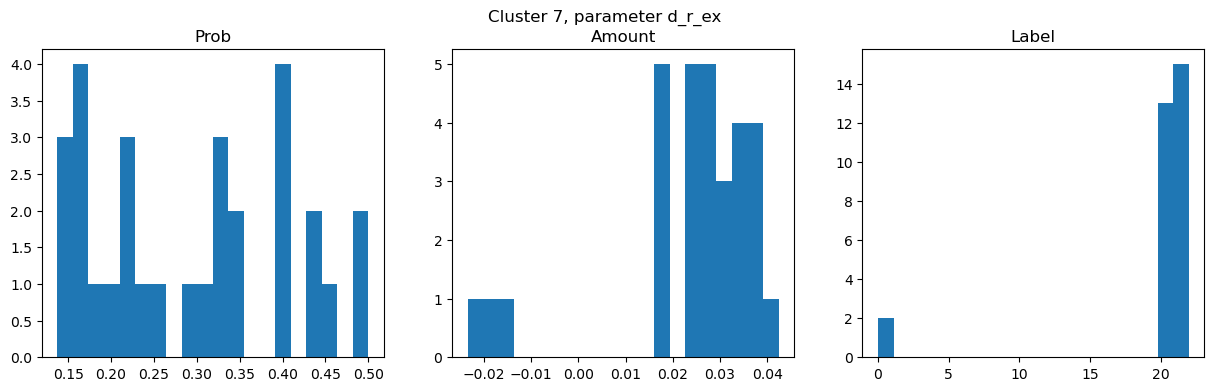

In [20]:
phenotype = 'Urate (1.0)'
image_data = os.path.join(rootpath, phenotype, f'inferred_change_{phenotype}.nii.gz')
process_brain_volume(image_data, rootpath, phenotype)

Cluster 1 :
Intensity : 16
Parameter : -0.7*s_in + 0.7*s_sphere
Center of Cluster (x, y, z): [25.2        40.29230769 33.26153846]
Cluster size (number of vox): 65
Tract label : 31 

Cluster 2 :
Intensity : 16
Parameter : -0.7*s_in + 0.7*s_sphere
Center of Cluster (x, y, z): [25.55  44.15  47.675]
Cluster size (number of vox): 40
Tract label : 0 

Cluster 3 :
Intensity : 16
Parameter : -0.7*s_in + 0.7*s_sphere
Center of Cluster (x, y, z): [32.58064516 37.83870968 48.06451613]
Cluster size (number of vox): 31
Tract label : 0 

Cluster 4 :
Intensity : 16
Parameter : -0.7*s_in + 0.7*s_sphere
Center of Cluster (x, y, z): [35.53846154 45.38461538 63.07692308]
Cluster size (number of vox): 26
Tract label : 0 

Cluster 5 :
Intensity : 16
Parameter : -0.7*s_in + 0.7*s_sphere
Center of Cluster (x, y, z): [35.05555556 34.27777778 57.88888889]
Cluster size (number of vox): 36
Tract label : 0 

Cluster 6 :
Intensity : 16
Parameter : -0.7*s_in + 0.7*s_sphere
Center of Cluster (x, y, z): [34.8846153

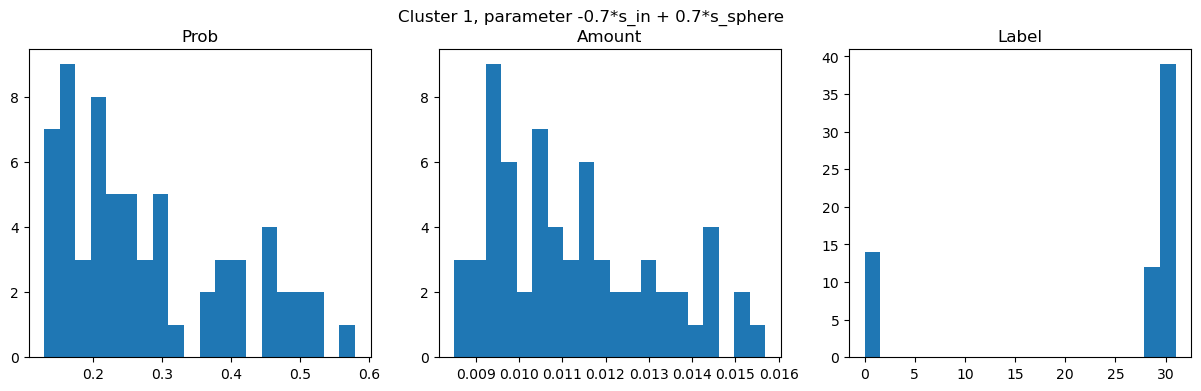

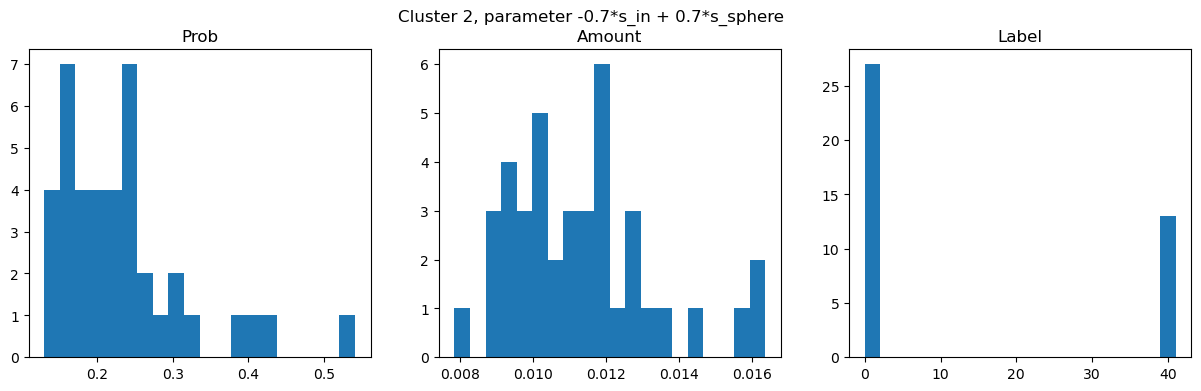

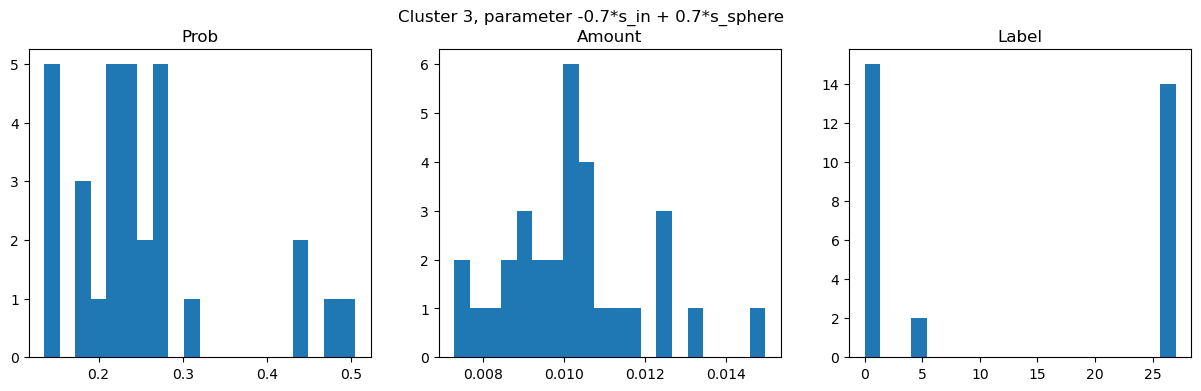

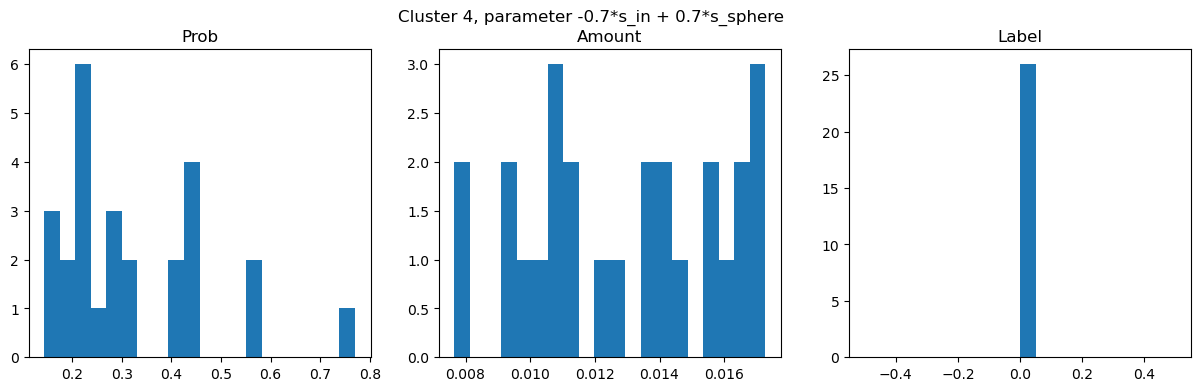

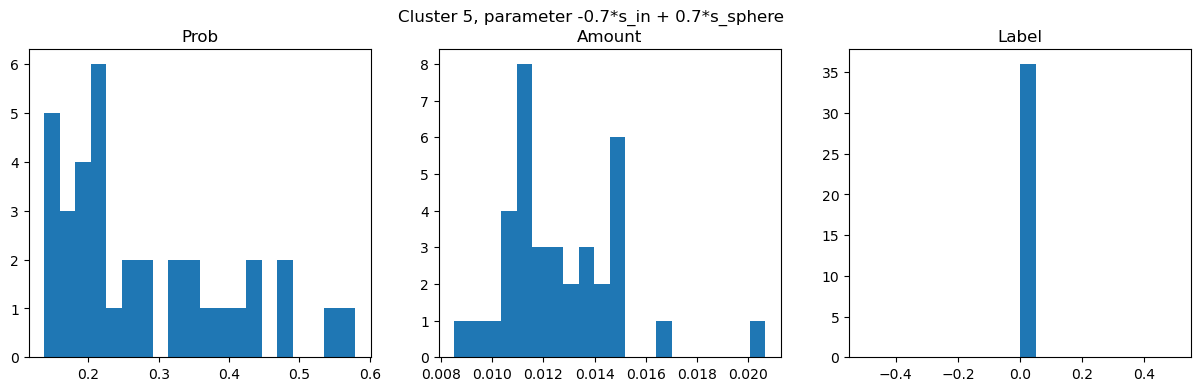

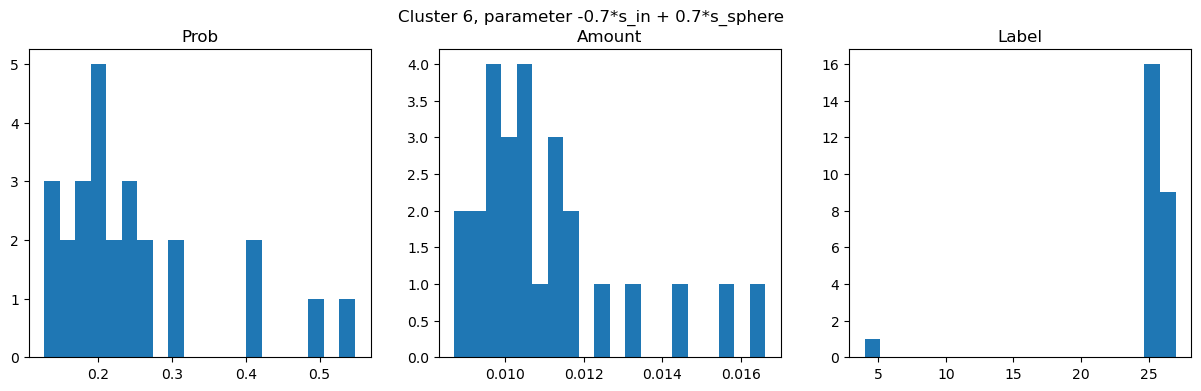

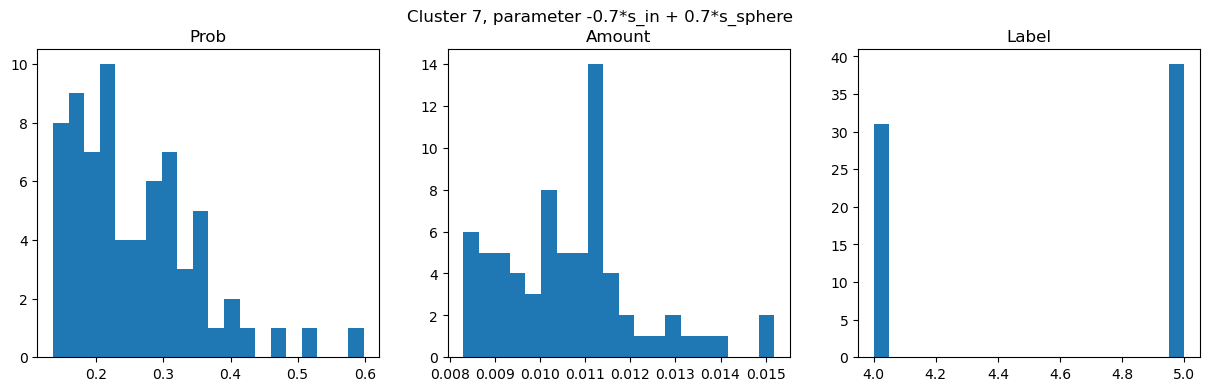

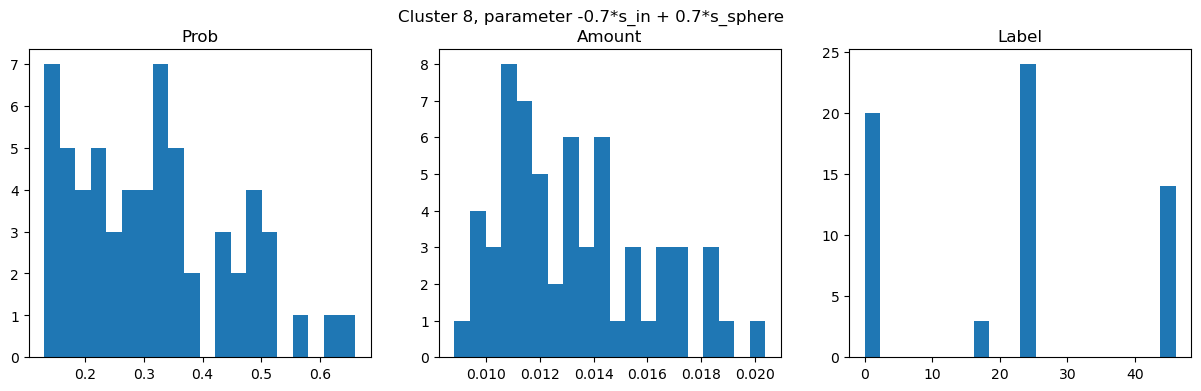

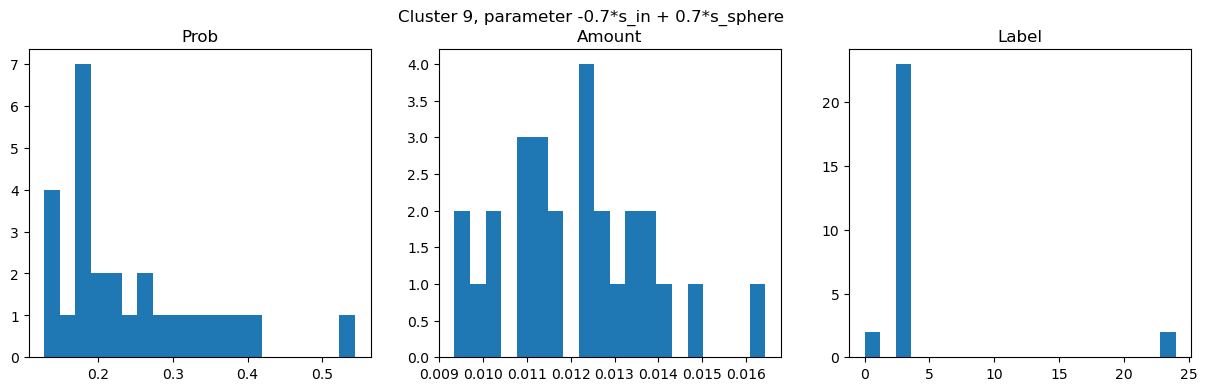

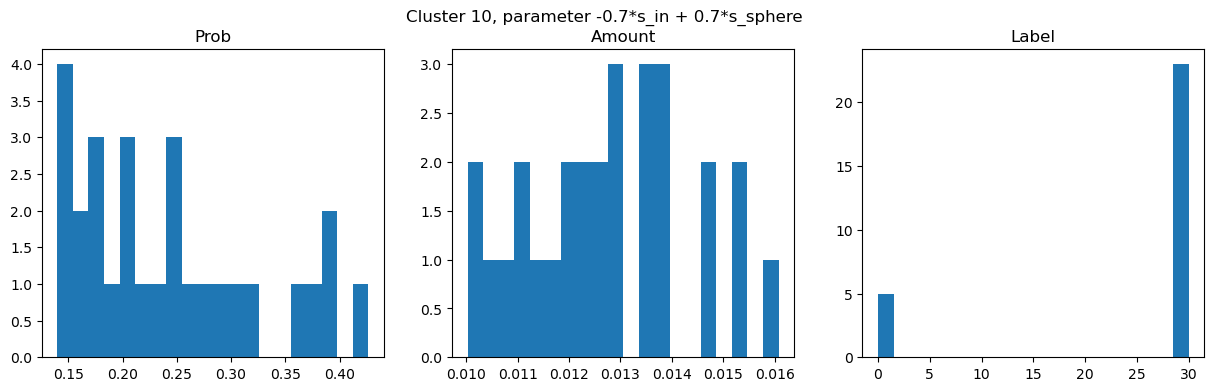

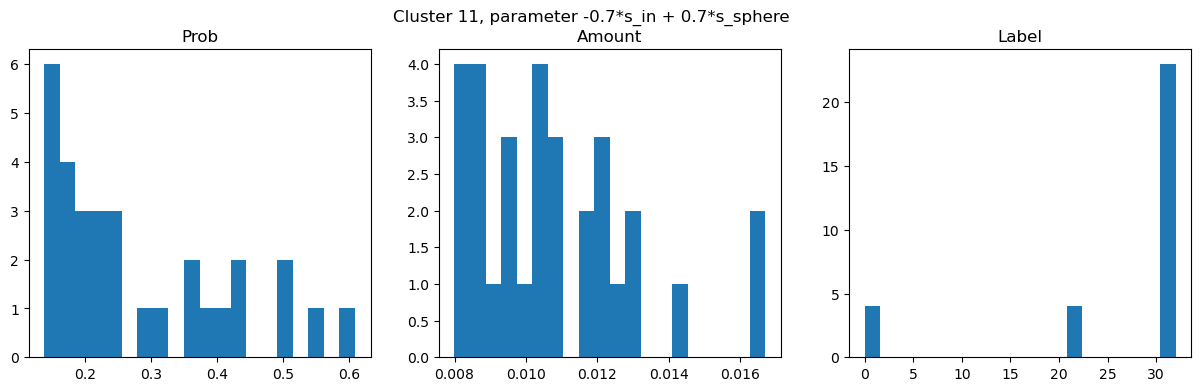

In [21]:
phenotype = 'Cystatin C (1.0)'
image_data = os.path.join(rootpath, phenotype, f'inferred_change_{phenotype}.nii.gz')
process_brain_volume(image_data, rootpath, phenotype)

Cluster 1 :
Intensity : 9
Parameter : d_r_ex
Center of Cluster (x, y, z): [21.02857143 40.11428571 34.37142857]
Cluster size (number of vox): 35
Tract label : 0 

Cluster 2 :
Intensity : 9
Parameter : d_r_ex
Center of Cluster (x, y, z): [26.98373984 58.30894309 48.14634146]
Cluster size (number of vox): 123
Tract label : 41 

Cluster 3 :
Intensity : 9
Parameter : d_r_ex
Center of Cluster (x, y, z): [24.32142857 61.14285714 24.64285714]
Cluster size (number of vox): 28
Tract label : 0 

Cluster 4 :
Intensity : 9
Parameter : d_r_ex
Center of Cluster (x, y, z): [27.81481481 45.61111111 44.07407407]
Cluster size (number of vox): 54
Tract label : 0 

Cluster 5 :
Intensity : 9
Parameter : d_r_ex
Center of Cluster (x, y, z): [28.59259259 30.18518519 38.11111111]
Cluster size (number of vox): 27
Tract label : 29 

Cluster 6 :
Intensity : 9
Parameter : d_r_ex
Center of Cluster (x, y, z): [30.84810127 54.6835443  50.83544304]
Cluster size (number of vox): 79
Tract label : 25 

Cluster 7 :
Intens

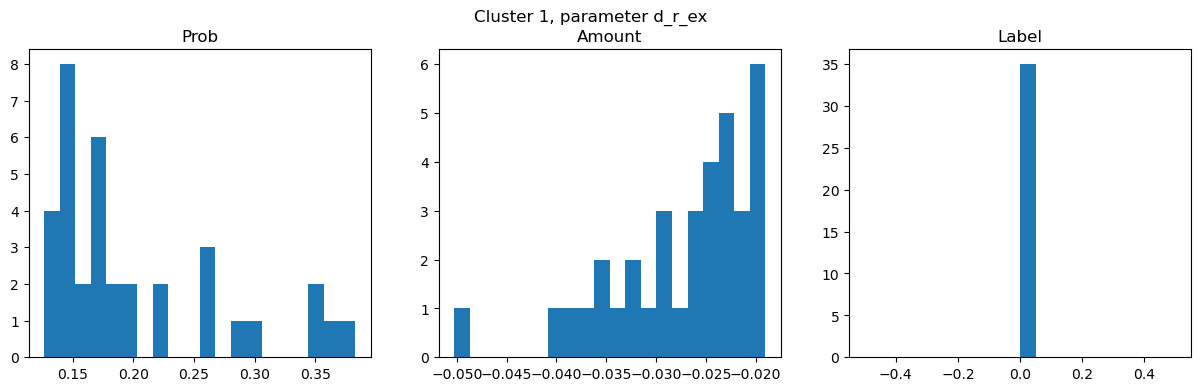

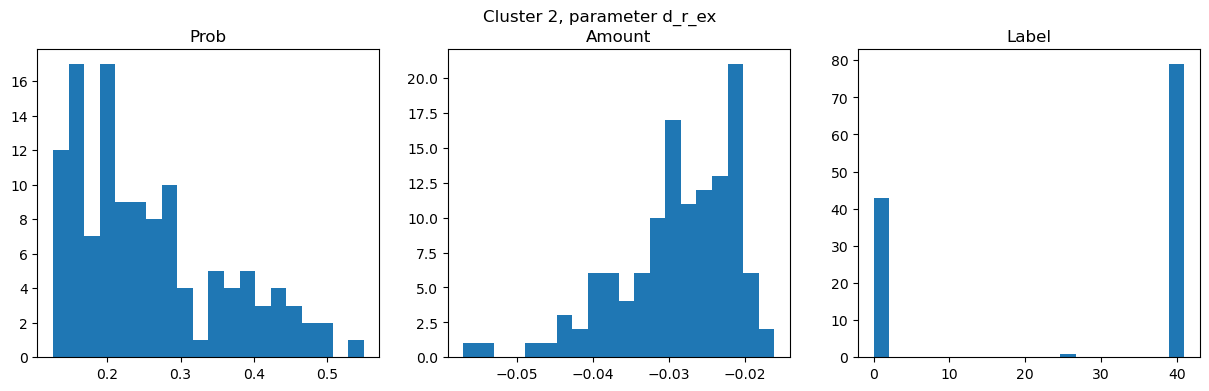

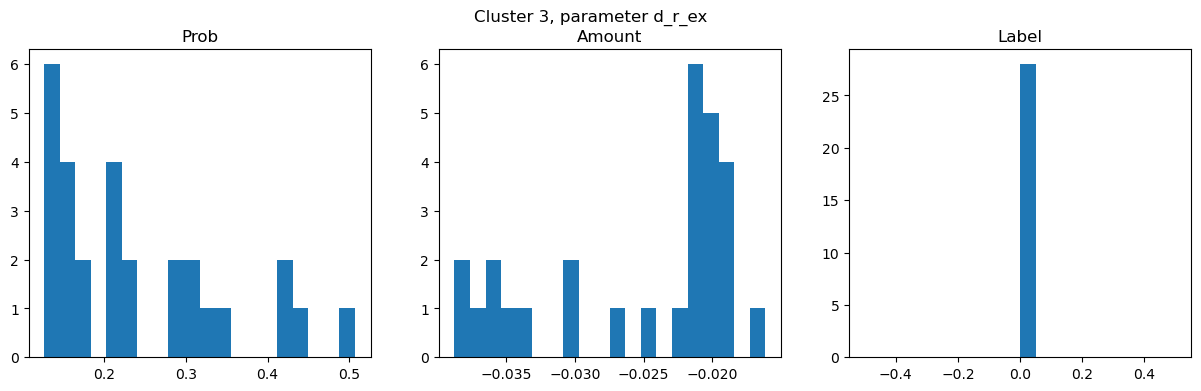

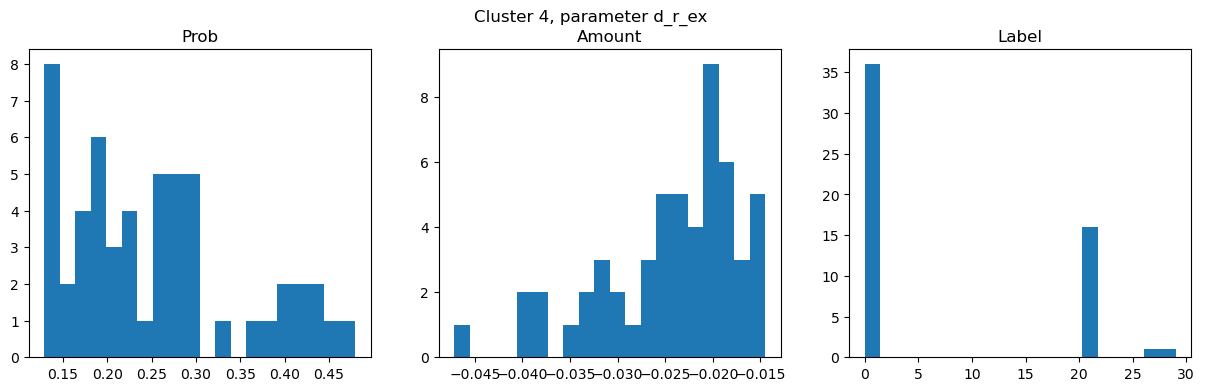

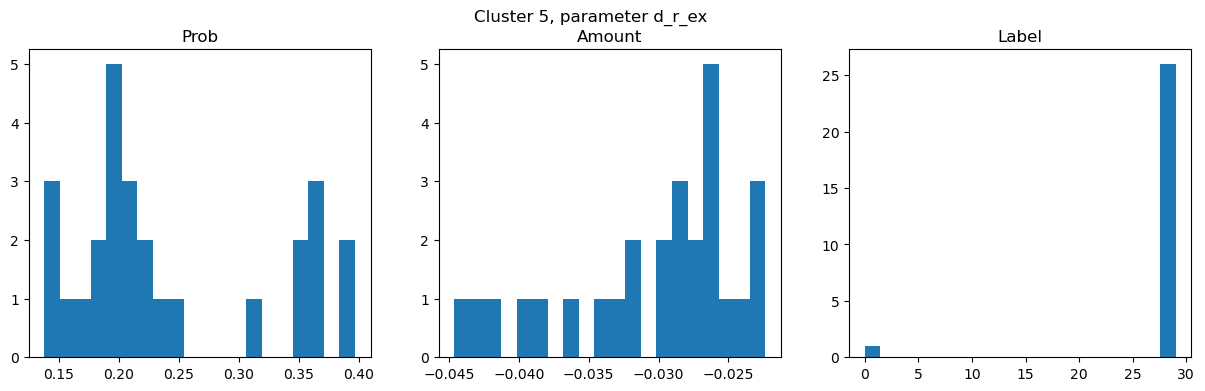

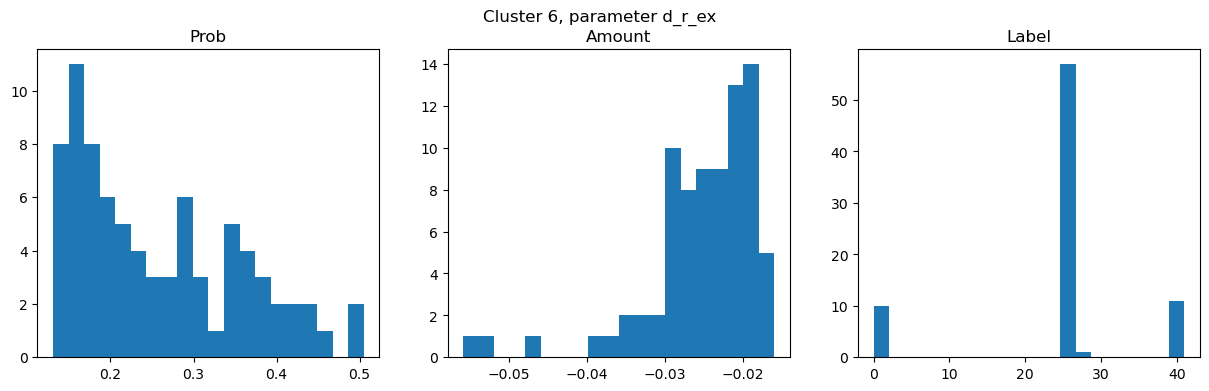

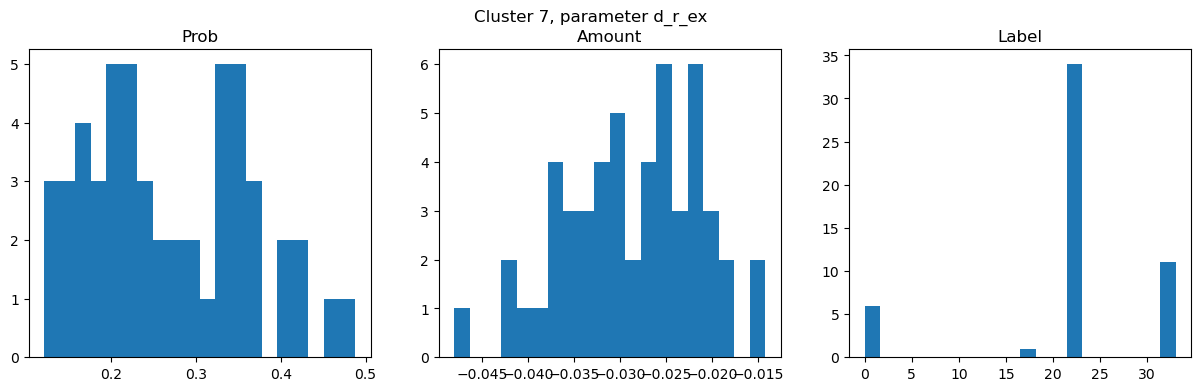

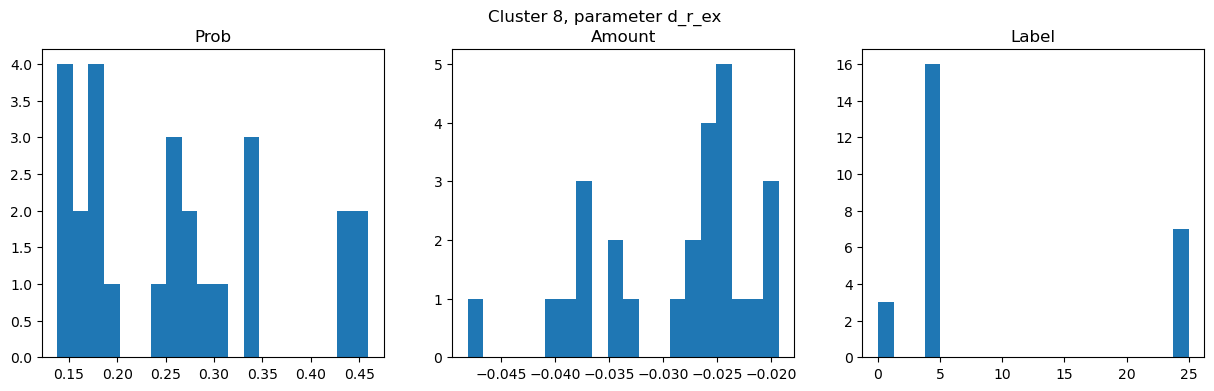

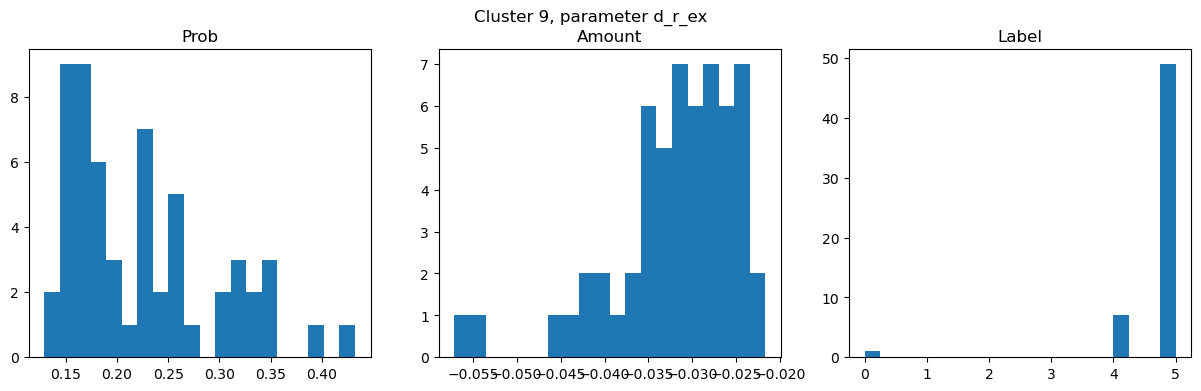

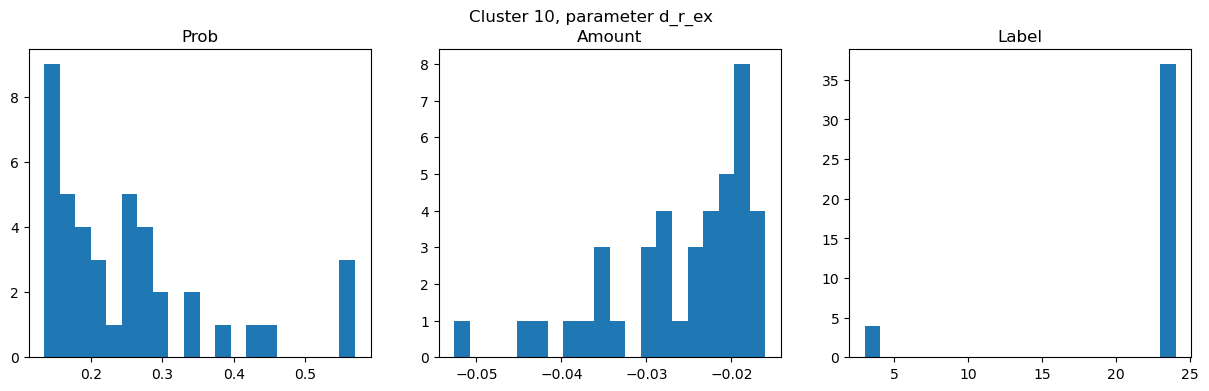

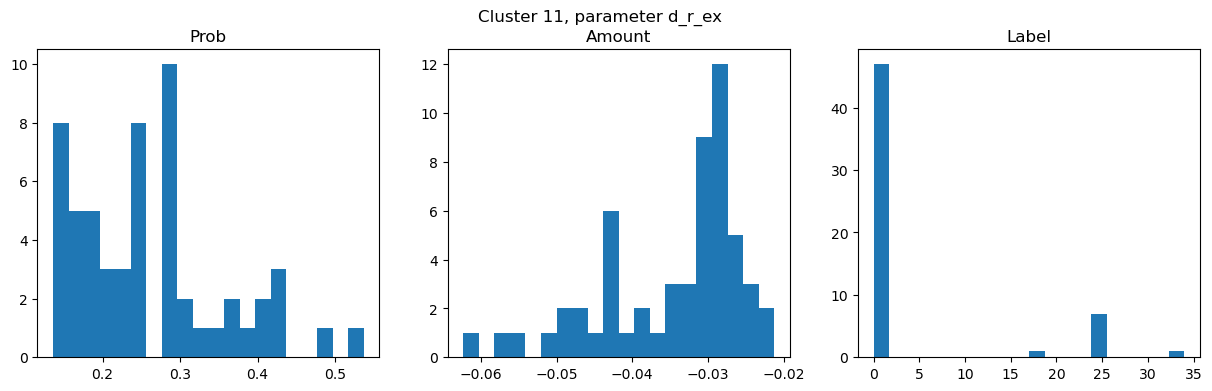

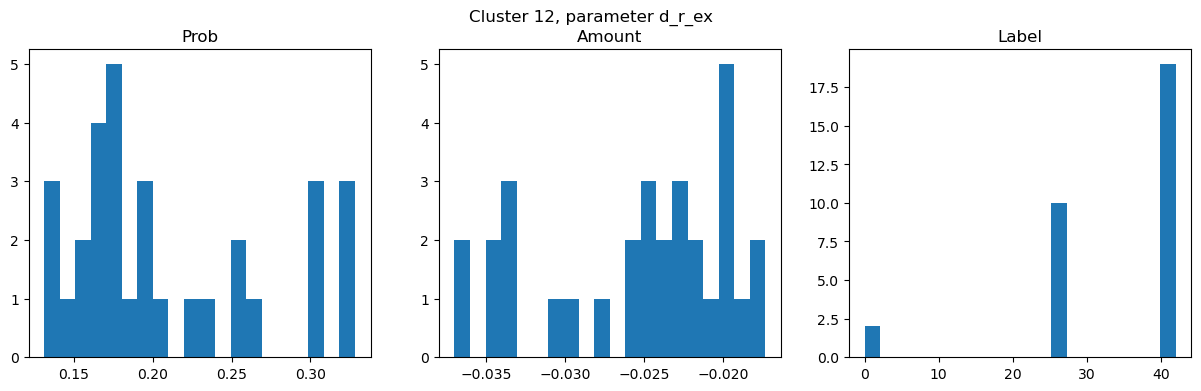

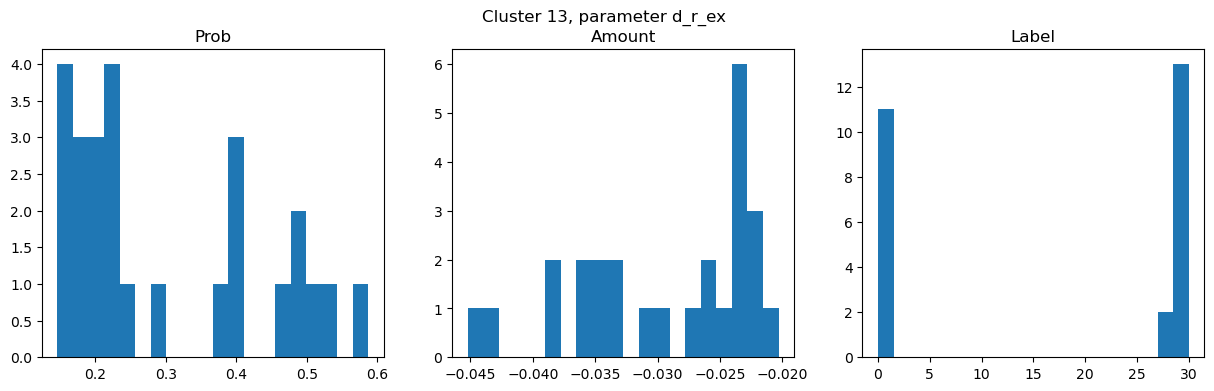

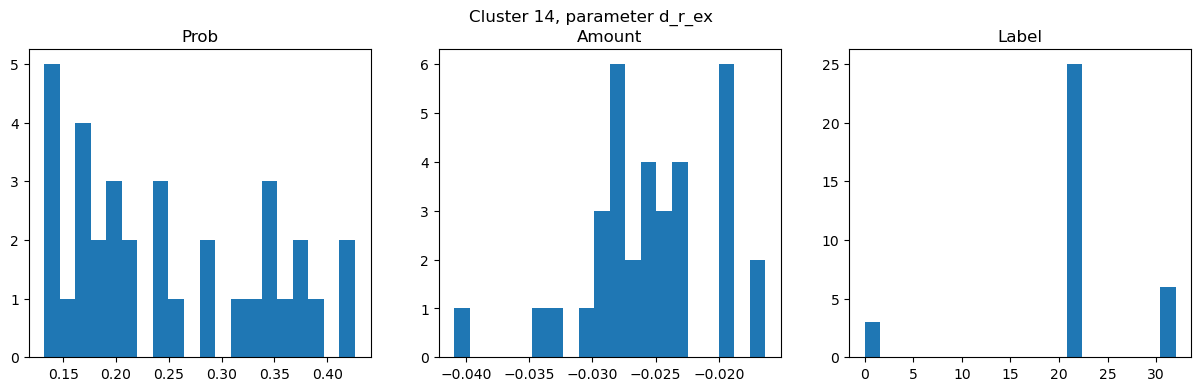

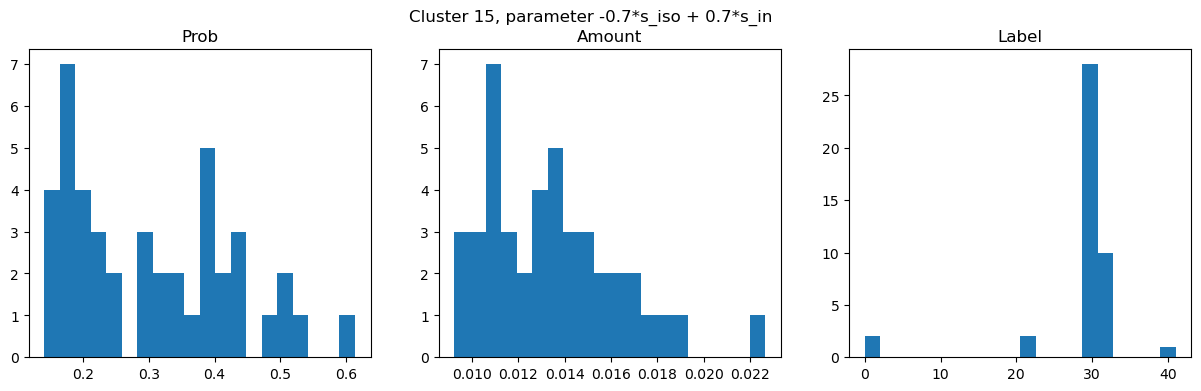

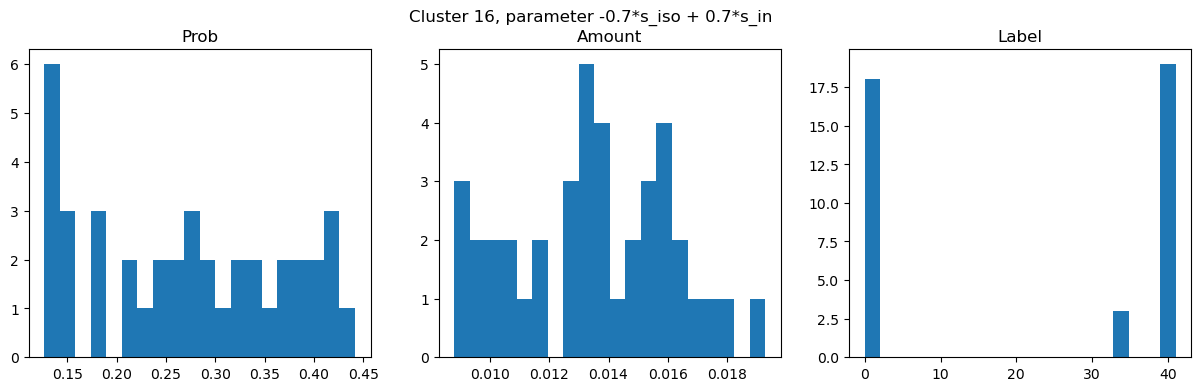

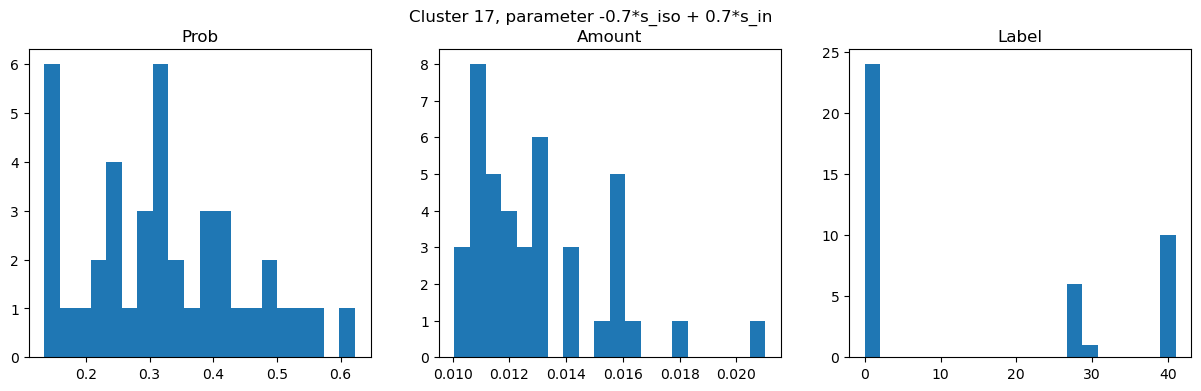

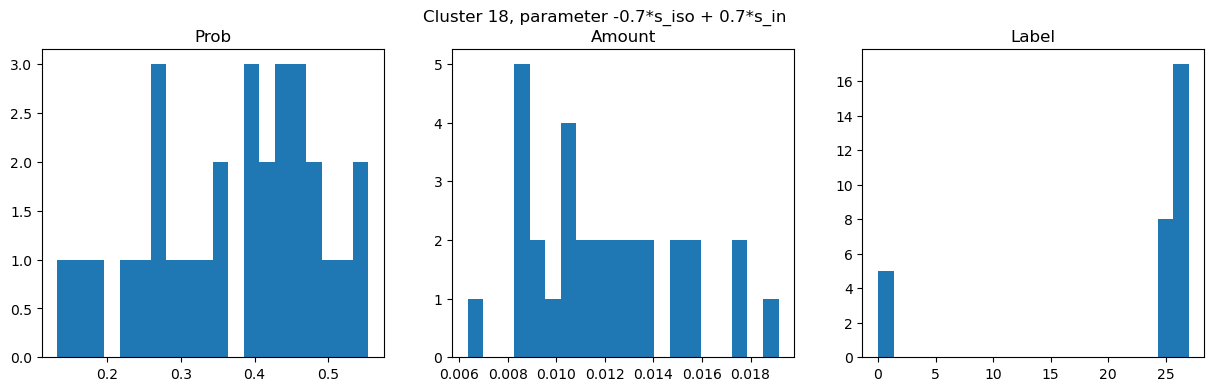

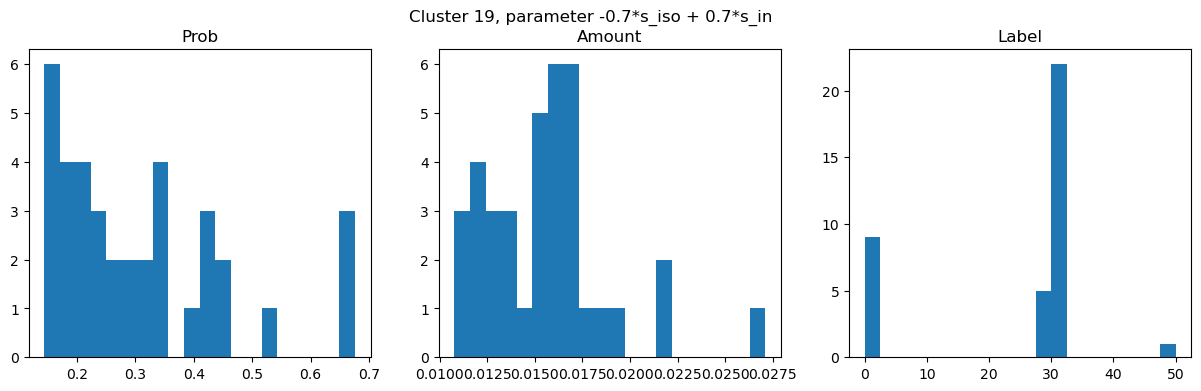

In [35]:
phenotype = 'Creatinine (1.0)'
image_data = os.path.join(rootpath, phenotype, f'inferred_change_{phenotype}.nii.gz')
process_brain_volume(image_data, rootpath, phenotype)

Cluster 1 :
Intensity : 5
Parameter : odi
Center of Cluster (x, y, z): [53.34710744 62.26446281 52.92561983]
Cluster size (number of vox): 121
Tract label : 26 

Cluster 2 :
Intensity : 5
Parameter : odi
Center of Cluster (x, y, z): [66.51162791 43.3255814  35.60465116]
Cluster size (number of vox): 129
Tract label : 0 

Cluster 3 :
Intensity : 13
Parameter : -0.7*s_iso + 0.7*s_in
Center of Cluster (x, y, z): [32.15789474 39.62280702 46.28947368]
Cluster size (number of vox): 114
Tract label : 5 

Cluster 4 :
Intensity : 13
Parameter : -0.7*s_iso + 0.7*s_in
Center of Cluster (x, y, z): [34.41866667 66.264      46.34933333]
Cluster size (number of vox): 375
Tract label : 25 

Cluster 5 :
Intensity : 13
Parameter : -0.7*s_iso + 0.7*s_in
Center of Cluster (x, y, z): [54.8129771  63.22137405 46.        ]
Cluster size (number of vox): 262
Tract label : 0 

Cluster 6 :
Intensity : 16
Parameter : -0.7*s_in + 0.7*s_sphere
Center of Cluster (x, y, z): [23.28272251 42.69633508 33.54450262]
Clust

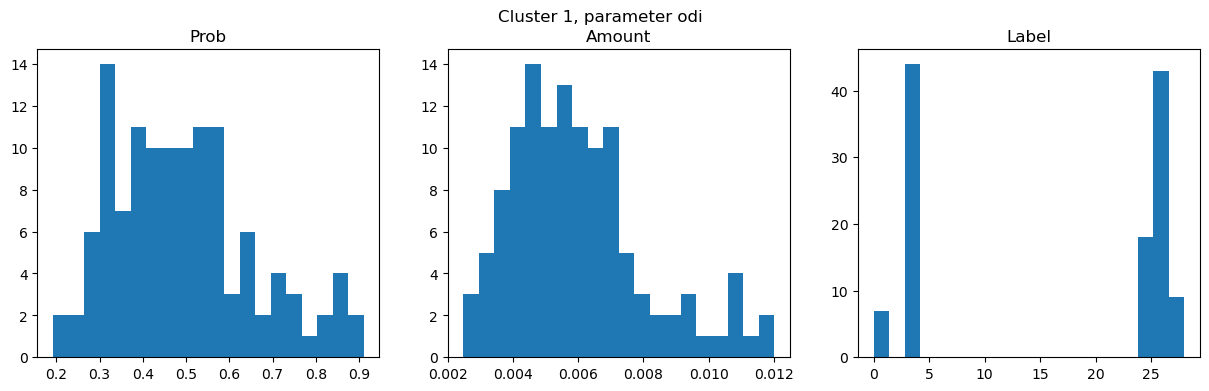

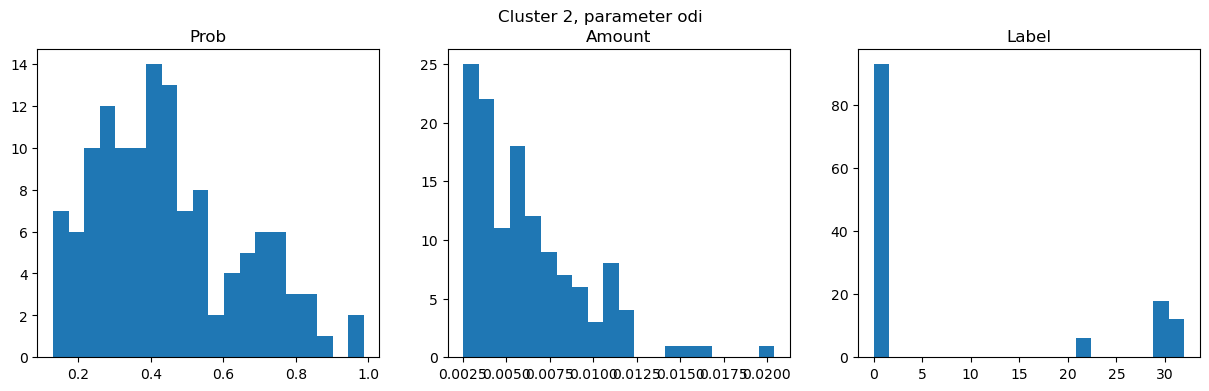

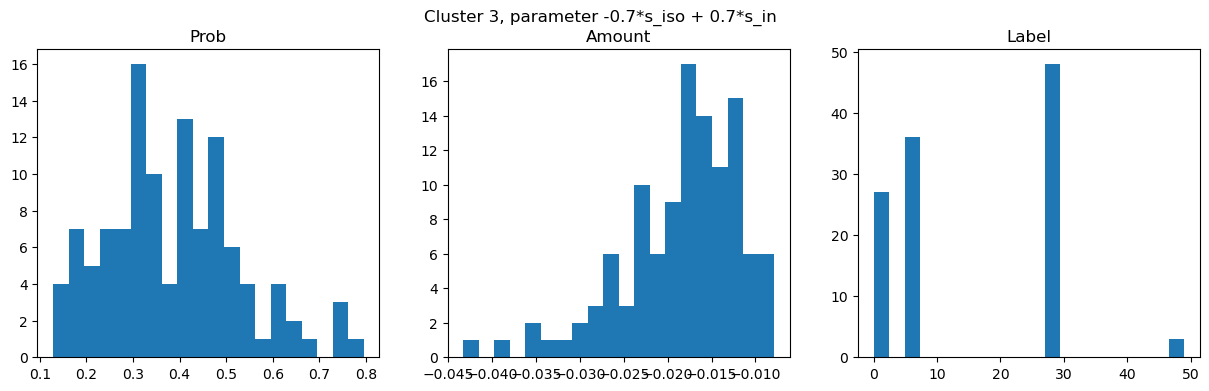

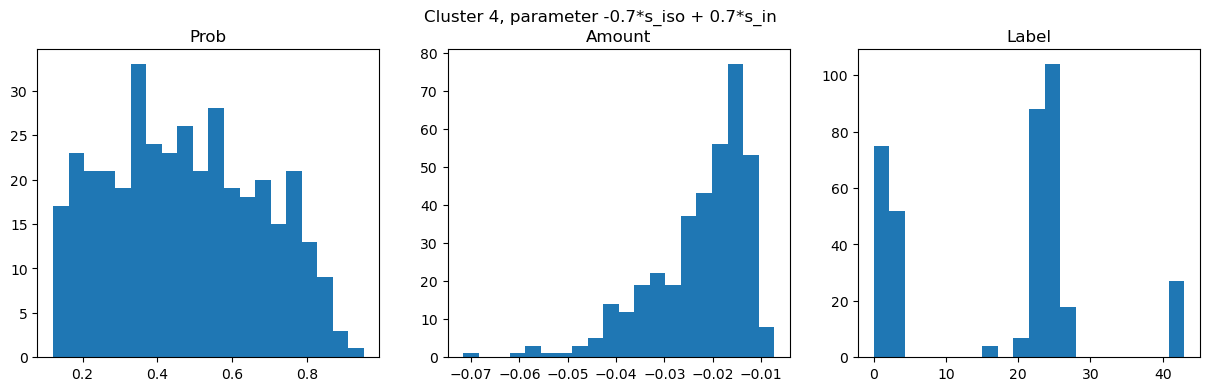

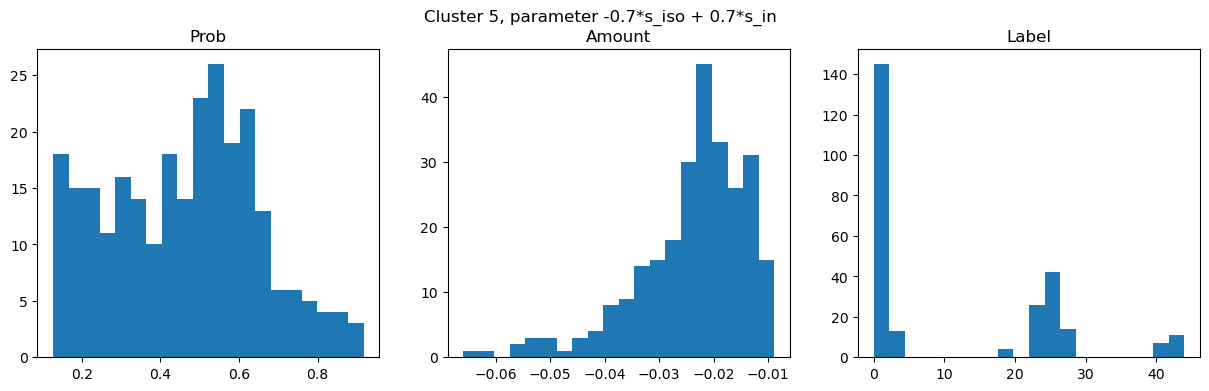

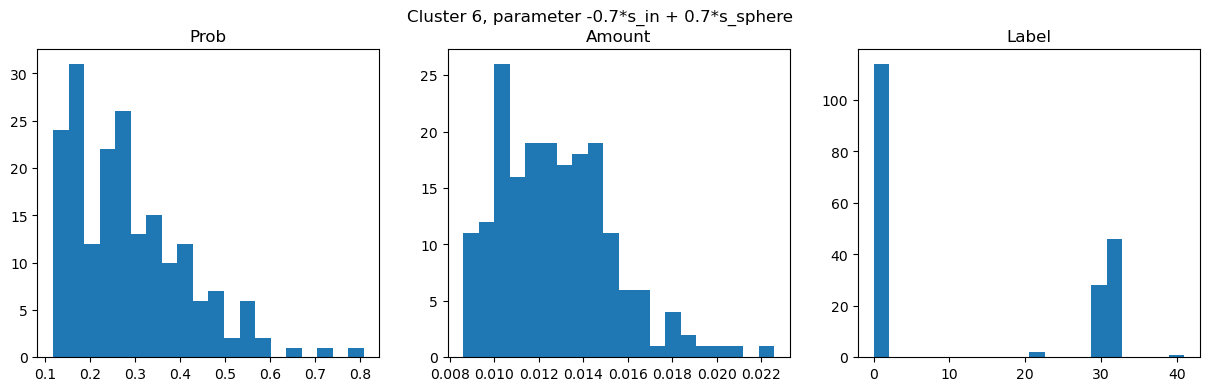

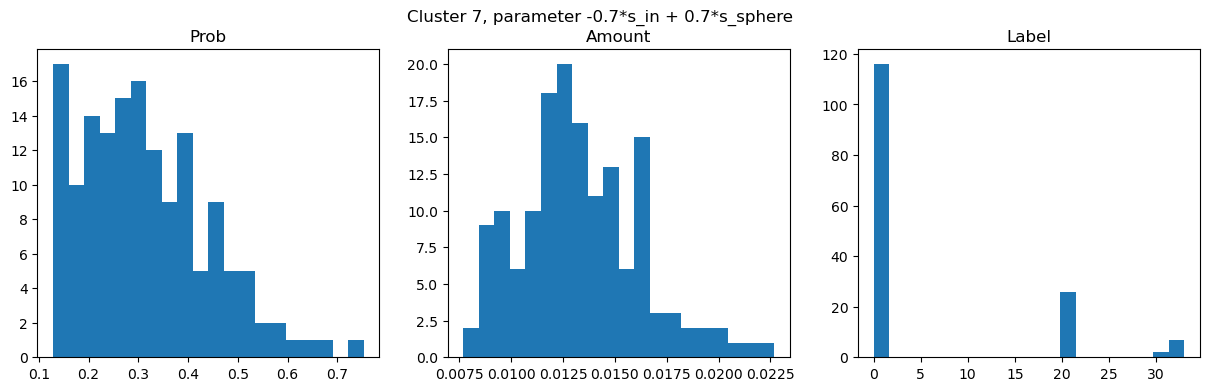

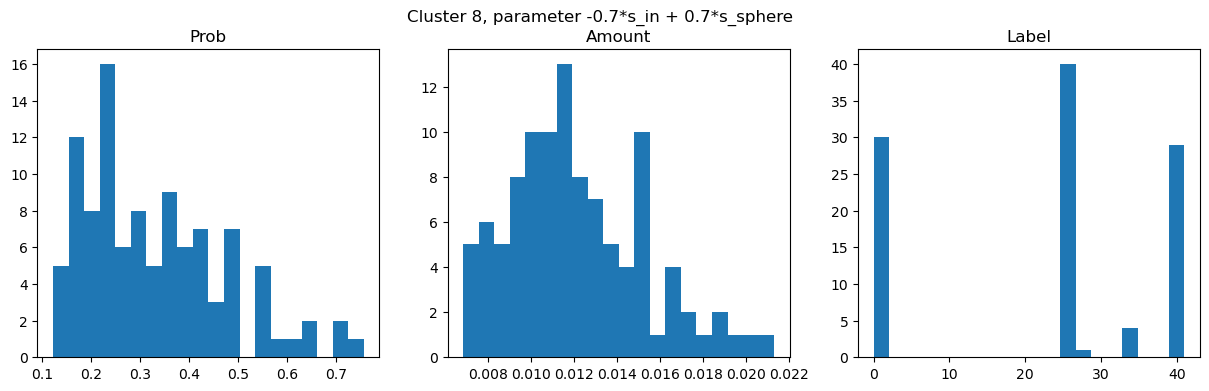

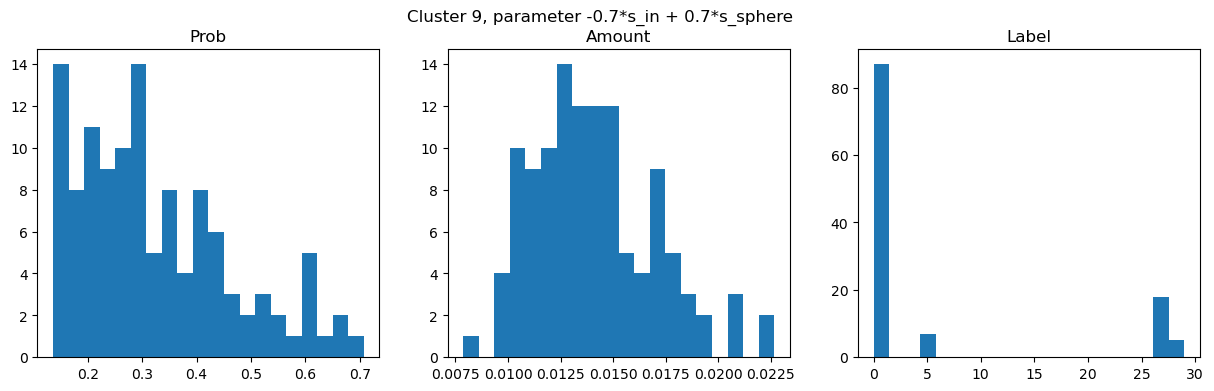

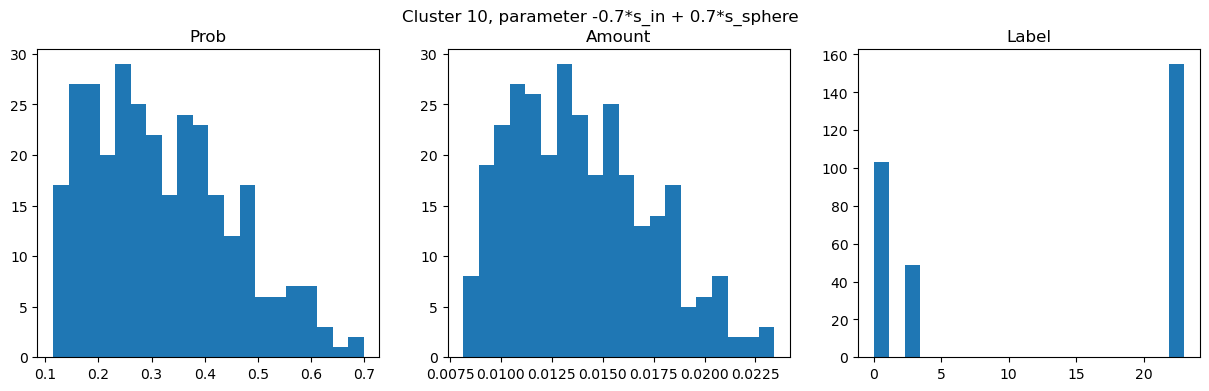

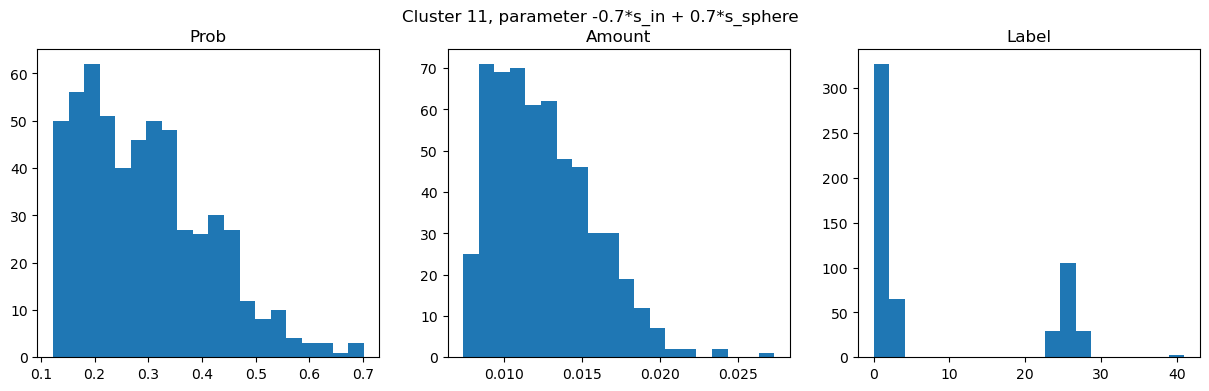

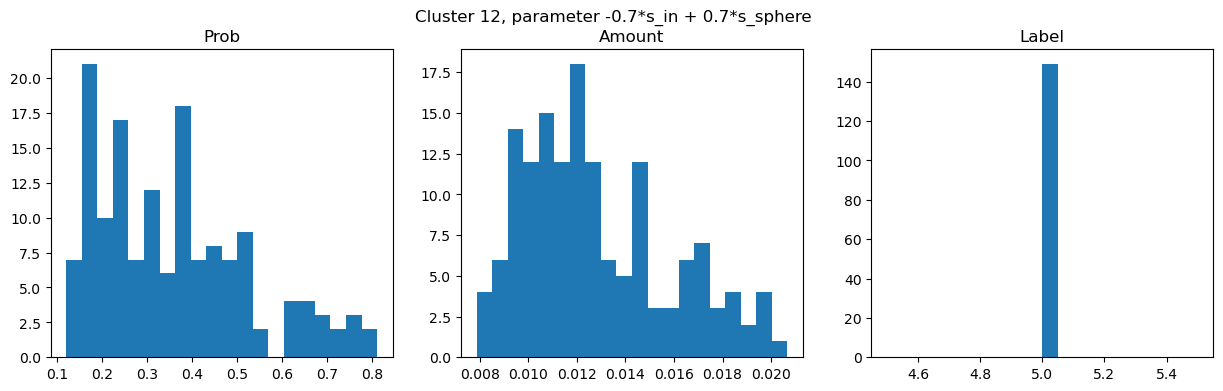

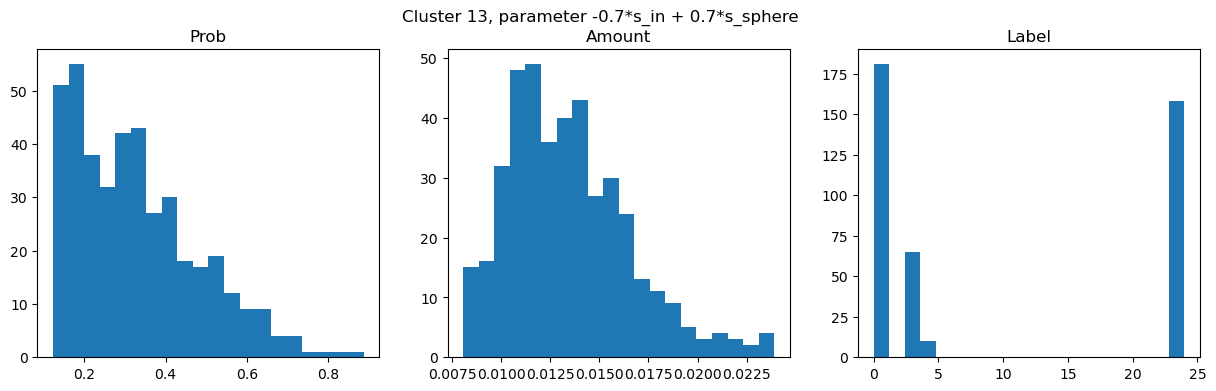

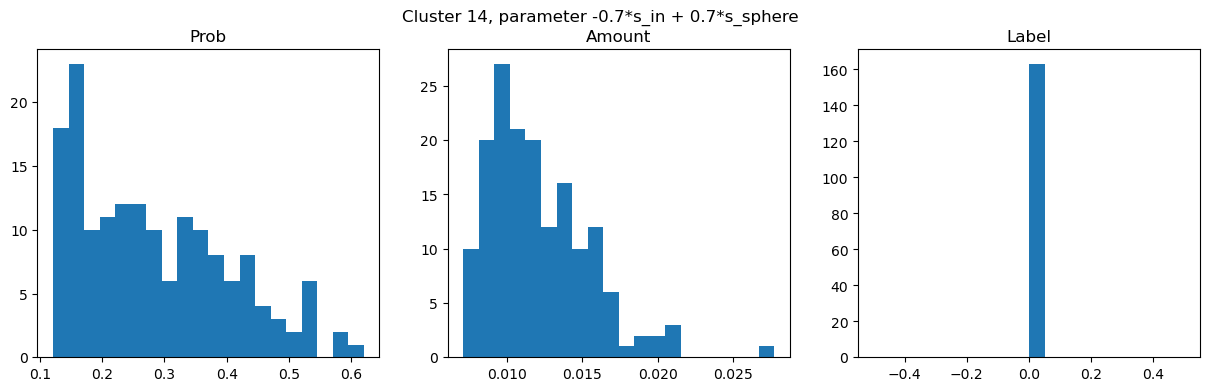

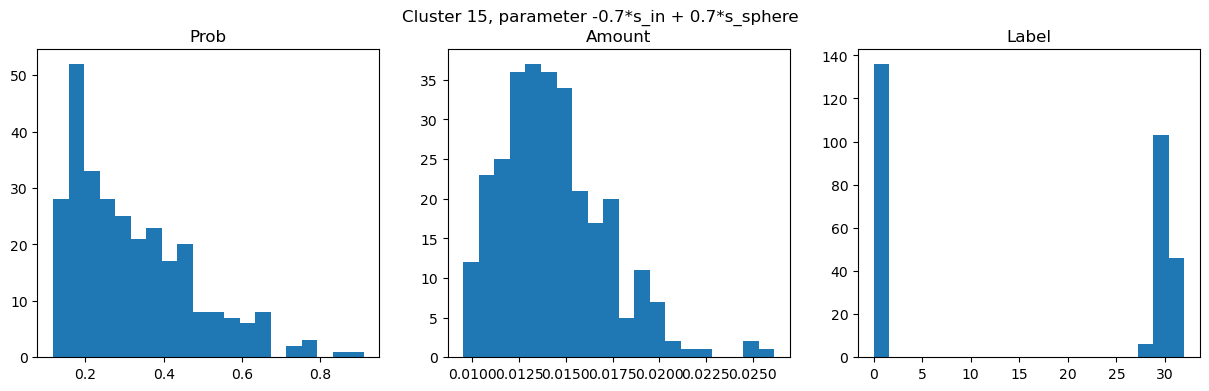

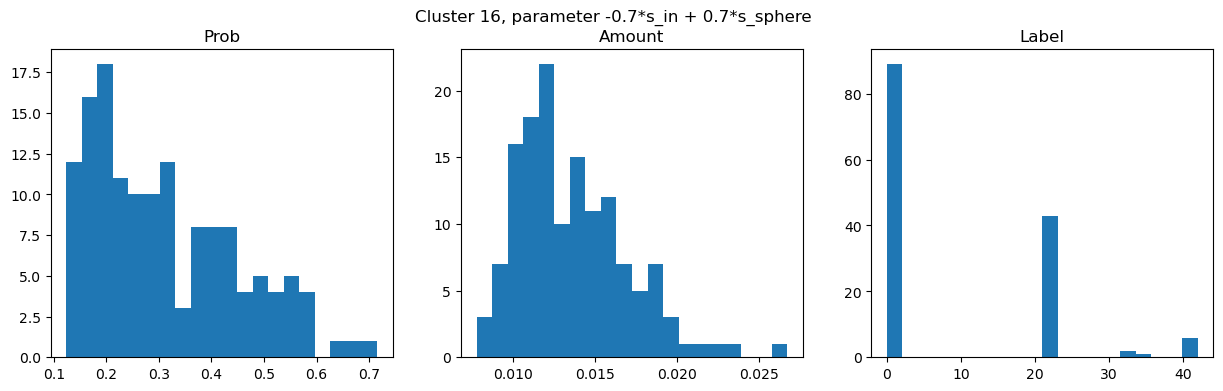

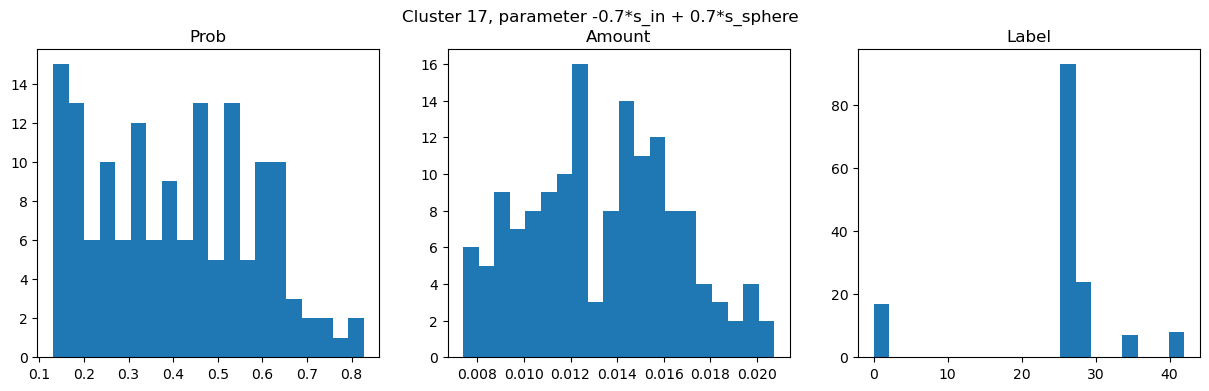

In [38]:
phenotype = 'Glycated haemoglobin (HbA1c) (1.0)'
image_data = os.path.join(rootpath, phenotype, f'inferred_change_{phenotype}.nii.gz')
process_brain_volume(image_data, rootpath, phenotype, voxel_threshold=100)

Cluster 1 :
Intensity : 9
Parameter : d_r_ex
Center of Cluster (x, y, z): [64.13793103 60.86206897 49.82758621]
Cluster size (number of vox): 29
Tract label : 0 



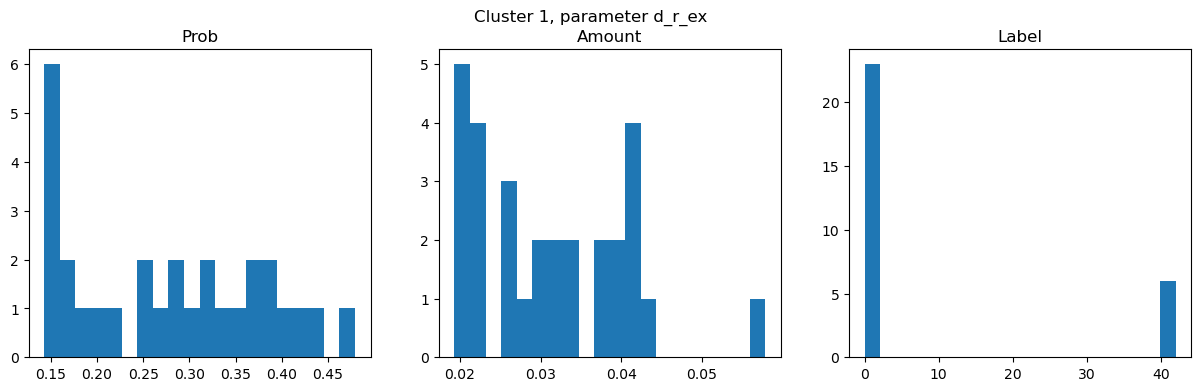

In [44]:
phenotype = 'Minimum carotid IMT (intima-medial thickness) at 210 degrees  (2.0)'
image_data = os.path.join(rootpath, phenotype, f'inferred_change_{phenotype}.nii.gz')
process_brain_volume(image_data, rootpath, phenotype, voxel_threshold=25)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a matrix just for the sake of having something to generate a colorbar from
data = np.random.random((10, 10))

fig, ax = plt.subplots(figsize=(6, 2))
fig.subplots_adjust(bottom=0.5)

cax = ax.imshow(data, interpolation='nearest', cmap='hot')
ax.set_visible(False)  # Hide the main axis

cbar = fig.colorbar(cax, orientation='horizontal', ticks=[])
cbar.outline.set_visible(False)  # Remove the colorbar outline

plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a matrix just for the sake of having something to generate a colorbar from
data = np.random.random((10, 10))

fig, ax = plt.subplots(figsize=(6, 2), facecolor='black')
fig.subplots_adjust(bottom=0.5)

cax = ax.imshow(data, interpolation='nearest', cmap='hot')
ax.set_facecolor('black') # Set axis background to black
ax.set_visible(False)  # Hide the main axis

cbar = fig.colorbar(cax, orientation='horizontal', ticks=[], ax=ax, aspect=80)
cbar.outline.set_visible(False)  # Remove the colorbar outline

# Ensure the space around the plot is black
fig.patch.set_facecolor('black')
fig.patch.set_alpha(1.0)

plt.tight_layout()
plt.show()
